<a href="https://colab.research.google.com/github/Slanz99/Proj_Co2_DS/blob/CO2_Colab_Final/CO2_Project_DataScientest_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO2 Project Datascientest


# 💾1. Upload and Import Data

In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Dataset df Europa: `df`




In [ ]:
# filename Andrew
# filename = '/content/drive/MyDrive/DataScientest CO2 Project/data.csv'

# filename Stefan
#filename = "/content/drive/MyDrive/Data Science/Projects/CO2 Project/data/data.csv"

# navid
#filename='/content/drive/MeineAblage/Datascientest/data.csv'
# filename '/content/drive/MyDrive/Datascientest/data.csv'

# filename = '/content/drive/MyDrive/DataScientest CO2 Project/data.csv'
filename='/content/drive/MyDrive/Datascientest/data.csv'

df = pd.read_csv(filename, sep=',', index_col = 0, low_memory=False)
df.head(5)

FileNotFoundError: ignored

In [ ]:
print("Shape df:,", df.shape)

display(df.columns)

Shape df:, (9479280, 37)


Index(['Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve',
       'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [ ]:
df.describe()

MMS          r        m (kg)            Mt  Enedc (g/km)  Ewltp (g/km)  \
count  0.0  9479280.0  9.479149e+06  8.418686e+06  1.528918e+06  9.464562e+06   
mean   NaN        1.0  1.528414e+03  1.649678e+03  5.844413e+00  1.083741e+02   
std    NaN        0.0  3.529906e+02  3.639260e+02  1.342827e+01  5.827240e+01   
min    NaN        1.0  5.700000e+02  6.110000e+02  0.000000e+00  0.000000e+00   
25%    NaN        1.0  1.263000e+03  1.381000e+03  0.000000e+00  1.010000e+02   
50%    NaN        1.0  1.457000e+03  1.582000e+03  0.000000e+00  1.230000e+02   
75%    NaN        1.0  1.739000e+03  1.866000e+03  0.000000e+00  1.400000e+02   
max    NaN        1.0  4.600000e+03  4.711000e+03  4.900000e+01  7.300000e+02   

             W (mm)      At1 (mm)      At2 (mm)      ec (cm3)       ep (KW)  \
count  9.457478e+06  9.266098e+06  9.250258e+06  8.201472e+06  9.455287e+06   
mean   2.670370e+03  1.553386e+03  1.555455e+03  1.544100e+03  1.094856e+02   
std    1.681655e+02  5.932143e+01  6.352023e+01  5.186744e+02  5.707495e+01   
min    6.000000e+02  5.200000e+02  5.200000e+02  4.000000e+00  4.000000e+00   
25%    2.570000e+03  1.520000e+03  1.520000e+03  1.197000e+03  7.400000e+01   
50%    2.667000e+03  1.559000e+03  1.558000e+03  1.498000e+03  9.600000e+01   
75%    2.730000e+03  1.590000e+03  1.595000e+03  1.968000e+03  1.290000e+02   
max    5.405000e+03  3.000000e+03  3.000000e+03  7.993000e+03  1.177000e+03   

          z (Wh/km)  Ernedc (g/km)  Erwltp (g/km)   De   Vf       year  \
count  2.083147e+06            0.0   5.067277e+06  0.0  0.0  9479280.0   
mean   1.719975e+02            NaN   1.518618e+00  NaN  NaN     2022.0   
std    3.145552e+01            NaN   4.911724e-01  NaN  NaN        0.0   
min    1.000000e+01            NaN   5.000000e-01  NaN  NaN     2022.0   
25%    1.540000e+02            NaN   1.100000e+00  NaN  NaN     2022.0   
50%    1.650000e+02            NaN   1.700000e+00  NaN  NaN     2022.0   
75%    1.830000e+02            NaN   2.000000e+00  NaN  NaN     2022.0   
max    9.990000e+02            NaN   6.000000e+00  NaN  NaN     2022.0   

       Fuel consumption   Electric range (km)  
count       7.244541e+06         1.612374e+06  
mean        5.287703e+00         2.507469e+02  
std         1.767007e+00         1.877736e+02  
min         5.000000e-01         1.300000e+01  
25%         4.700000e+00         6.200000e+01  
50%         5.400000e+00         2.300000e+02  
75%         6.000000e+00         4.310000e+02  
max         2.800000e+01         8.430000e+02

<a name="drop"></a>
## 1.2 Drop Columns | get rid of:



1.   drop NaN:  100% NaN | ['MMS', 'Ernedc (g/km)', 'De', 'Vf']
1. from: 3.1 Exploring the objects
>* 3.1.1 'Ve'     : delete column |
>* 3.1.2 'Status' : delete column | because of missing information of the key
>* 3.1.3 'Mp'     : delete column |
>* 3.1.5 'Man'    : delete column | Mh categorie is more specific (IAA-IV for example is Einzelgenehmigung )
>* 3.1.6 'Mh'     : keep ✅|same data as 'Man' les
>* 3.1.7 'Tan'    : delete column | too high effort decryption
>* 3.1.8 'T'      : delete column | no information about T
>* 3.1.9 'Va'     : delete column | no spec. information
>* 3.1.12 ''       : keep |
>* 3.1.13 'IT'    : delete column | no specific information about it

1. from: 3.2 column

>* 3.2.2 'VFN'    : delete column |
>* 3.2.4 'Enedc'    : delete column |
>* 3.2.2 'At2'    : delete At2 column |

1. Decision

1. Missing Values

>* Electric range (km)     82.99
>*Erwltp (g/km)           46.54
>*At1 (mm)                 2.25
>*Date of registration     1.70
>*ep (KW)                  0.25
>*W (mm)                   0.23
>*Ct                       0.16
>*z (Wh/km)               78.02

### 1.2.1 Columns to drop = `drop`

In [ ]:
drop =  ['MMS', 'Ernedc (g/km)', 'De', 'Vf', 'Ve', "Status", 'Mp', 'Man', 'VFN','Man', 'Tan', 'T','Va',
         'IT', 'Mk','Cn', 'Cr', 'Enedc (g/km)', 'At2 (mm)', 'Electric range (km)', 'z (Wh/km)',
         'Erwltp (g/km)', 'Erwltp (g/km)', 'ep (KW)', 'W (mm)', 'Ct', 'Mt', 'r', 'year' ]

# 2 🧹 Clean Dataset `df_clean`

## 2.0 KNNInputer on Fuel **consumption**

In [ ]:
# Calculate n_neighbors
n_neighbors = int(np.sqrt(df.shape[0]))

display(n_neighbors)

3078

In [ ]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform the imputation on the 'FuelConsumption' column
df['Fuel consumption '] = imputer.fit_transform(df[['Fuel consumption ']])

In [ ]:
# Create a copy of the original DataFrame
df_original = df.copy()

# Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Fuel consumption '] = imputer.fit_transform(df[['Fuel consumption ']])

# Compare the original and imputed DataFrames
comparison = df_original.equals(df)
print('Are the original and imputed DataFrames identical?', comparison)

NameError: ignored

## 2.1 Drop | Cloumns | Missing Values

In [ ]:
# drop dict see 3.
drop =  ['MMS', 'Ernedc (g/km)', 'De', 'Vf', 'Ve', "Status", 'Mp', 'Man', 'VFN','Man', 'Tan', 'T','Va',
         'IT', 'Mk','Cn', 'Cr', 'Enedc (g/km)', 'At2 (mm)', 'Electric range (km)', 'Fm', 'z (Wh/km)',
         'Erwltp (g/km)', 'Erwltp (g/km)', 'ep (KW)', 'W (mm)', 'Ct', 'Mt', 'r', 'year', 'Date of registration' ]

df_clean = df.drop(drop, axis=1)

# show missing values

print('missing values:\n',df_clean.isna().sum(),"\n")

# drop missing values
df_clean = df_clean.dropna()

## check missing values
missing_values = df_clean.isna().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print("Check missing_values:/n/n",missing_values_sorted)


## Display Informations
print("df-Shape:/n",df.shape)
print("df_clean-Shape:/n",df_clean.shape)
print("df_clean-Info:/n",df_clean.info())


missing values:
 Country                    0
Mh                         0
m (kg)                   131
Ewltp (g/km)           14718
At1 (mm)              213182
Ft                         0
ec (cm3)             1277808
Fuel consumption     2234739
dtype: int64 

Check missing_values:/n/n Country              0
Mh                   0
m (kg)               0
Ewltp (g/km)         0
At1 (mm)             0
Ft                   0
ec (cm3)             0
Fuel consumption     0
dtype: int64
df-Shape:/n (9479280, 37)
df_clean-Shape:/n (7050218, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7050218 entries, 80960000 to 77551045
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Mh                 object 
 2   m (kg)             float64
 3   Ewltp (g/km)       float64
 4   At1 (mm)           float64
 5   Ft                 object 
 6   ec (cm3)           float64
 7   Fuel consumption   float64
dtypes: float64(

## 2.2 Informations

In [ ]:
df_clean.head()

Country       Mh  m (kg)  Ewltp (g/km)  At1 (mm)               Ft  \
ID                                                                           
80960000      DE  AUDI AG  2095.0         191.0    1603.0           DIESEL   
80960001      DE  AUDI AG  1910.0         179.0    1603.0           DIESEL   
80960002      DE  AUDI AG  1780.0         149.0    1603.0           DIESEL   
80960003      DE  AUDI AG  2150.0          35.0    1603.0  PETROL/ELECTRIC   
80960004      DE  AUDI AG  1780.0         148.0    1603.0           DIESEL   

          ec (cm3)  Fuel consumption   
ID                                     
80960000    2967.0                7.3  
80960001    2967.0                6.8  
80960002    1968.0                5.7  
80960003    1984.0                1.5  
80960004    1968.0                5.7

In [ ]:
df_clean.describe()

m (kg)  Ewltp (g/km)      At1 (mm)      ec (cm3)  \
count  7.050218e+06  7.050218e+06  7.050218e+06  7.050218e+06   
mean   1.480717e+03  1.250699e+02  1.551701e+03  1.546625e+03   
std    3.209321e+02  4.281589e+01  5.721105e+01  5.202373e+02   
min    5.700000e+02  1.200000e+01  5.200000e+02  6.580000e+02   
25%    1.250000e+03  1.150000e+02  1.520000e+03  1.197000e+03   
50%    1.425000e+03  1.270000e+02  1.554000e+03  1.498000e+03   
75%    1.655000e+03  1.430000e+02  1.585000e+03  1.968000e+03   
max    4.395000e+03  7.000000e+02  3.000000e+03  7.993000e+03   

       Fuel consumption   
count       7.050218e+06  
mean        5.269761e+00  
std         1.771283e+00  
min         5.000000e-01  
25%         4.700000e+00  
50%         5.400000e+00  
75%         6.000000e+00  
max         2.800000e+01

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7050218 entries, 80960000 to 77551045
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Country            object 
 1   Mh                 object 
 2   m (kg)             float64
 3   Ewltp (g/km)       float64
 4   At1 (mm)           float64
 5   Ft                 object 
 6   ec (cm3)           float64
 7   Fuel consumption   float64
dtypes: float64(5), object(3)
memory usage: 484.1+ MB


## 2.4 Outliers

In [ ]:
df_clean.describe()

m (kg)  Ewltp (g/km)      At1 (mm)      ec (cm3)  \
count  7.050218e+06  7.050218e+06  7.050218e+06  7.050218e+06   
mean   1.480717e+03  1.250699e+02  1.551701e+03  1.546625e+03   
std    3.209321e+02  4.281589e+01  5.721105e+01  5.202373e+02   
min    5.700000e+02  1.200000e+01  5.200000e+02  6.580000e+02   
25%    1.250000e+03  1.150000e+02  1.520000e+03  1.197000e+03   
50%    1.425000e+03  1.270000e+02  1.554000e+03  1.498000e+03   
75%    1.655000e+03  1.430000e+02  1.585000e+03  1.968000e+03   
max    4.395000e+03  7.000000e+02  3.000000e+03  7.993000e+03   

       Fuel consumption   
count       7.050218e+06  
mean        5.269761e+00  
std         1.771283e+00  
min         5.000000e-01  
25%         4.700000e+00  
50%         5.400000e+00  
75%         6.000000e+00  
max         2.800000e+01

### 2.4.1 👓 First look - BEFORE (Boxplot and Histogram)

#### 2.4.1.1 Boxplot "before"

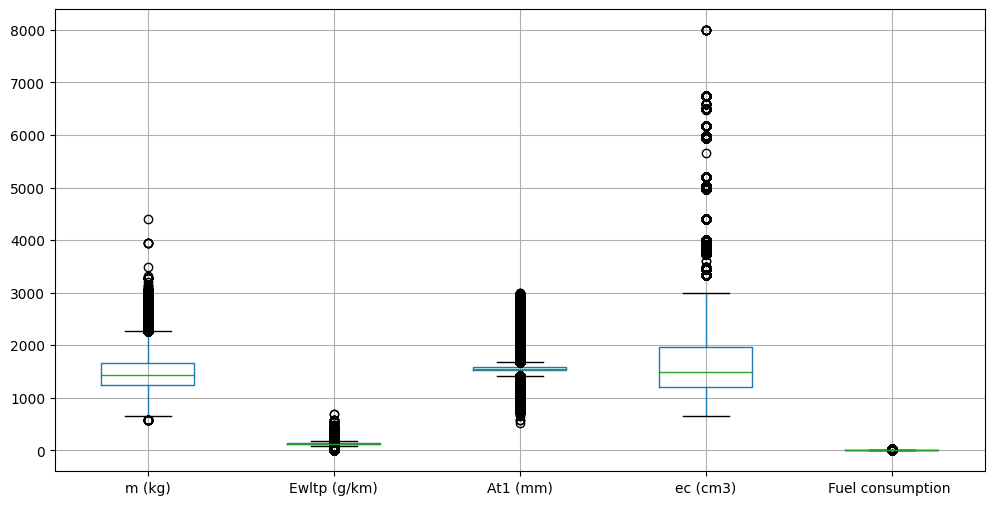

In [ ]:
# Boxplot
plt.figure(figsize=(12,6))
df_clean.boxplot()
plt.show()

#### Histogram before

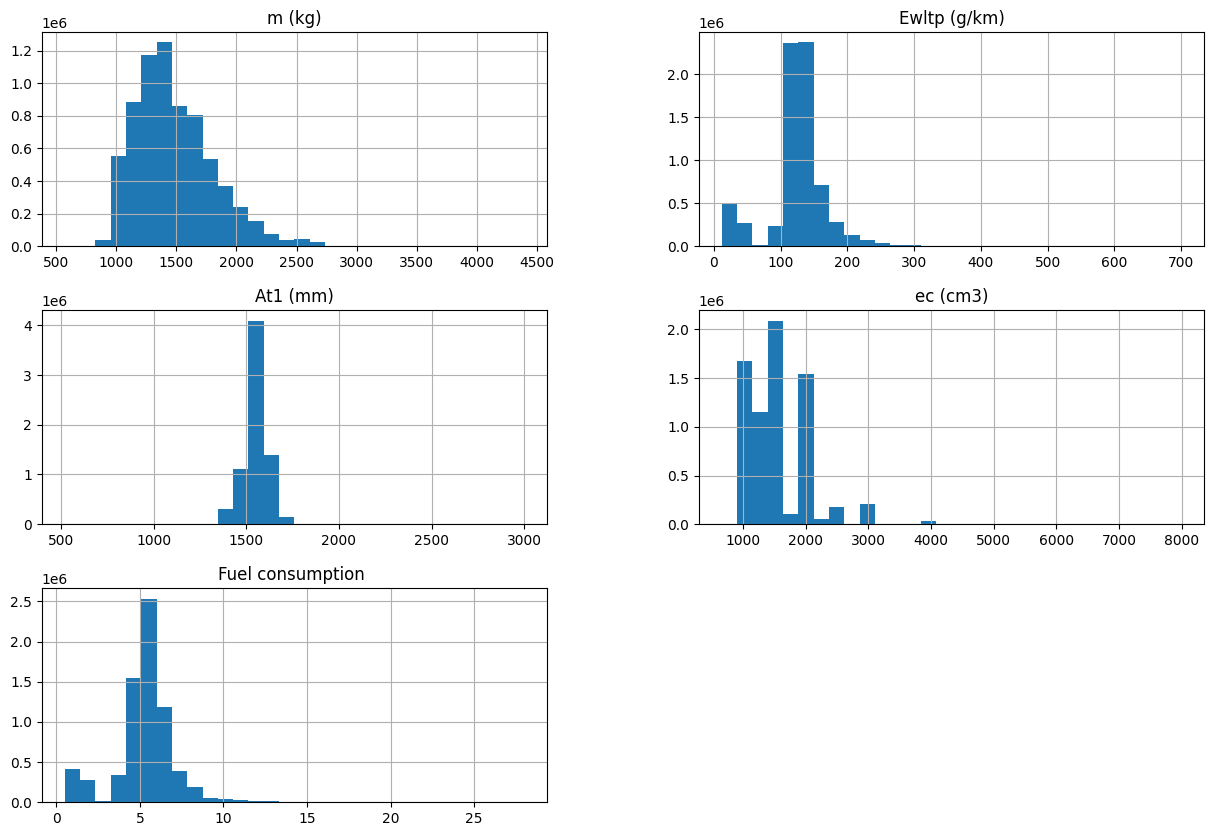

In [ ]:
# Histogram
df_clean.hist(bins=30, figsize=(15,10))
plt.show()

### 2.4.2 IQR

#### 2.4.2.1 Data before

In [ ]:
df_clean.describe()

m (kg)  Ewltp (g/km)      At1 (mm)      ec (cm3)  \
count  7.050218e+06  7.050218e+06  7.050218e+06  7.050218e+06   
mean   1.480717e+03  1.250699e+02  1.551701e+03  1.546625e+03   
std    3.209321e+02  4.281589e+01  5.721105e+01  5.202373e+02   
min    5.700000e+02  1.200000e+01  5.200000e+02  6.580000e+02   
25%    1.250000e+03  1.150000e+02  1.520000e+03  1.197000e+03   
50%    1.425000e+03  1.270000e+02  1.554000e+03  1.498000e+03   
75%    1.655000e+03  1.430000e+02  1.585000e+03  1.968000e+03   
max    4.395000e+03  7.000000e+02  3.000000e+03  7.993000e+03   

       Fuel consumption   
count       7.050218e+06  
mean        5.269761e+00  
std         1.771283e+00  
min         5.000000e-01  
25%         4.700000e+00  
50%         5.400000e+00  
75%         6.000000e+00  
max         2.800000e+01

#### 2.4.2.2 Identify

In [ ]:
# Identify
Q1 = df_clean.quantile(0.25, numeric_only=True)
Q3 = df_clean.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1


In [ ]:
# IQR 3

In [ ]:
# Analyze Outliers:
((df_clean < (Q1 - 3 * IQR)) | (df_clean > (Q3 + 3 * IQR))).sum()

<ipython-input-10-b3a794e50e60>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df_clean < (Q1 - 3 * IQR)) | (df_clean > (Q3 + 3 * IQR))).sum()


At1 (mm)               3211
Country                   0
Ewltp (g/km)         468793
Ft                        0
Fuel consumption     141276
Mh                        0
ec (cm3)              14434
m (kg)                  173
dtype: int64

#### 2.4.2.3 remove outliers

In [ ]:
df_clean_IQR = df_clean[~((df_clean < (Q1 - 3 * IQR)) | (df_clean > (Q3 + 3 * IQR))).any(axis=1)]

<ipython-input-11-329b54f0000b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean_IQR = df_clean[~((df_clean < (Q1 - 3 * IQR)) | (df_clean > (Q3 + 3 * IQR))).any(axis=1)]


#### 2.4.2.4 before and after removing outliers with IQR

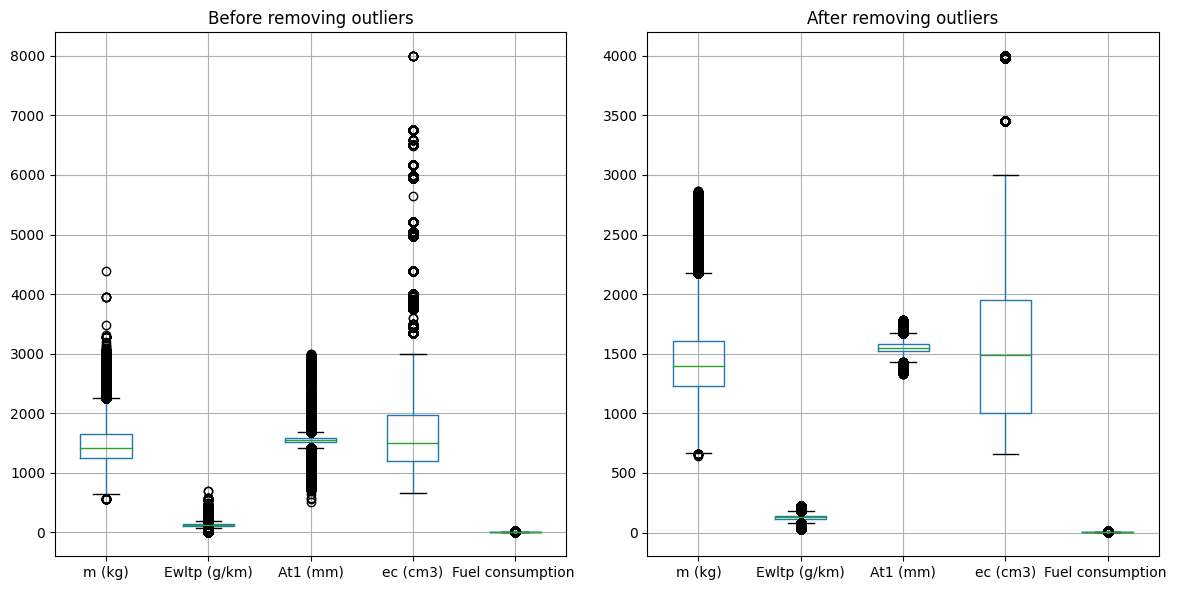

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Boxplot before removing outliers
df_clean.boxplot(ax=axes[0])
axes[0].set_title('Before removing outliers')

# Boxplot after removing outliers
df_clean_IQR.boxplot(ax=axes[1])
axes[1].set_title('After removing outliers')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
df_clean.columns

Index(['Country', 'Mh', 'm (kg)', 'Ewltp (g/km)', 'At1 (mm)', 'Ft', 'ec (cm3)',
       'Fuel consumption '],
      dtype='object')

In [ ]:
print('Before:',len(df_clean))
print('After IQR:',len(df_clean_IQR))
print('diff Start - IQR:', len(df_clean) - len(df_clean_IQR))

Before: 7050218
After IQR: 6569153
diff Start - IQR: 481065


In [ ]:
df_clean_IQR.describe()

m (kg)  Ewltp (g/km)      At1 (mm)      ec (cm3)  \
count  6.569153e+06  6.569153e+06  6.569153e+06  6.569153e+06   
mean   1.445469e+03  1.280493e+02  1.547672e+03  1.499110e+03   
std    2.921015e+02  3.232236e+01  5.415186e+01  4.472199e+02   
min    6.450000e+02  3.100000e+01  1.330000e+03  6.580000e+02   
25%    1.233000e+03  1.170000e+02  1.520000e+03  9.990000e+02   
50%    1.396000e+03  1.280000e+02  1.550000e+03  1.490000e+03   
75%    1.610000e+03  1.430000e+02  1.580000e+03  1.950000e+03   
max    2.868000e+03  2.270000e+02  1.780000e+03  3.996000e+03   

       Fuel consumption   
count       6.569153e+06  
mean        5.353818e+00  
std         1.349735e+00  
min         9.000000e-01  
25%         4.800000e+00  
50%         5.400000e+00  
75%         6.000000e+00  
max         9.800000e+00

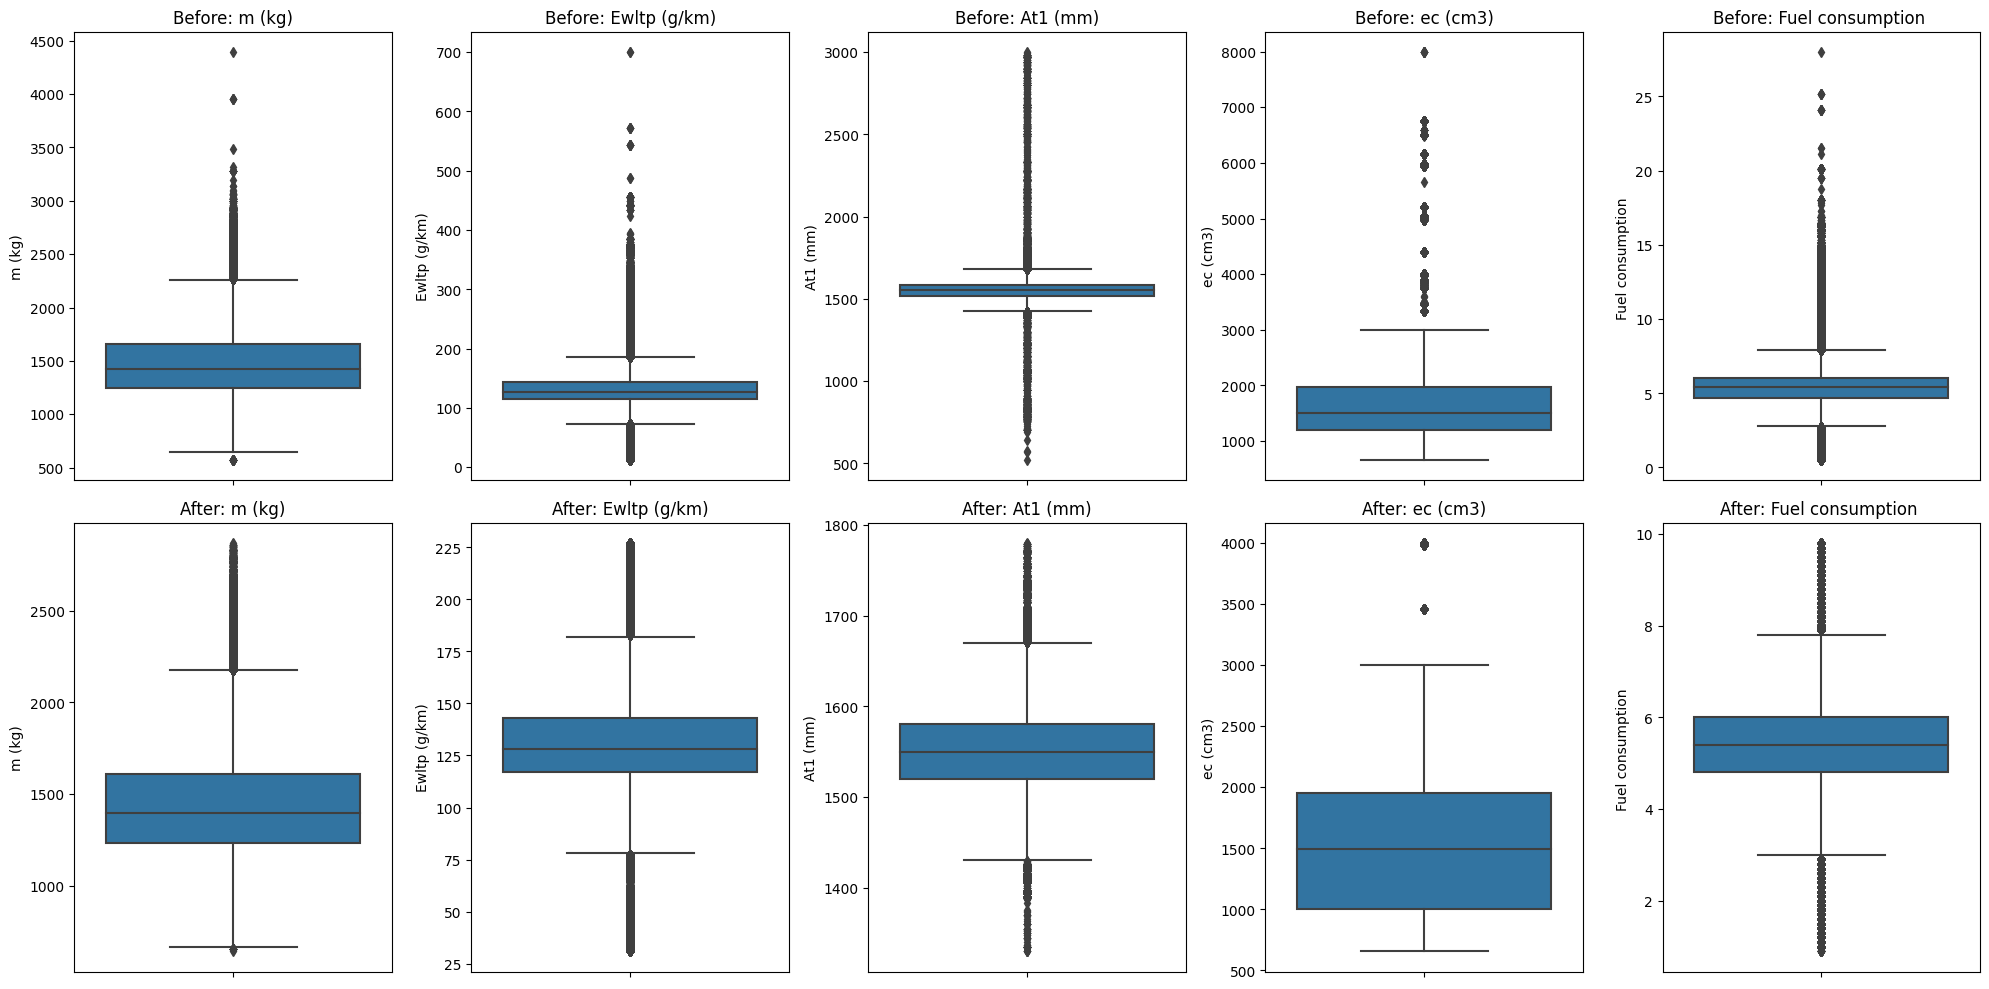

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=len(df_clean.select_dtypes(include=[np.number]).columns), figsize=(20,10))

for i, col in enumerate(df_clean.select_dtypes(include=[np.number]).columns):
    # Boxplot before removing outliers
    sns.boxplot(ax=axes[0, i], y=df_clean[col])
    axes[0, i].set_title('Before: ' + col)

    # Boxplot after removing outliers
    sns.boxplot(ax=axes[1, i], y=df_clean_IQR[col])
    axes[1, i].set_title('After: ' + col)

plt.tight_layout()
plt.show()

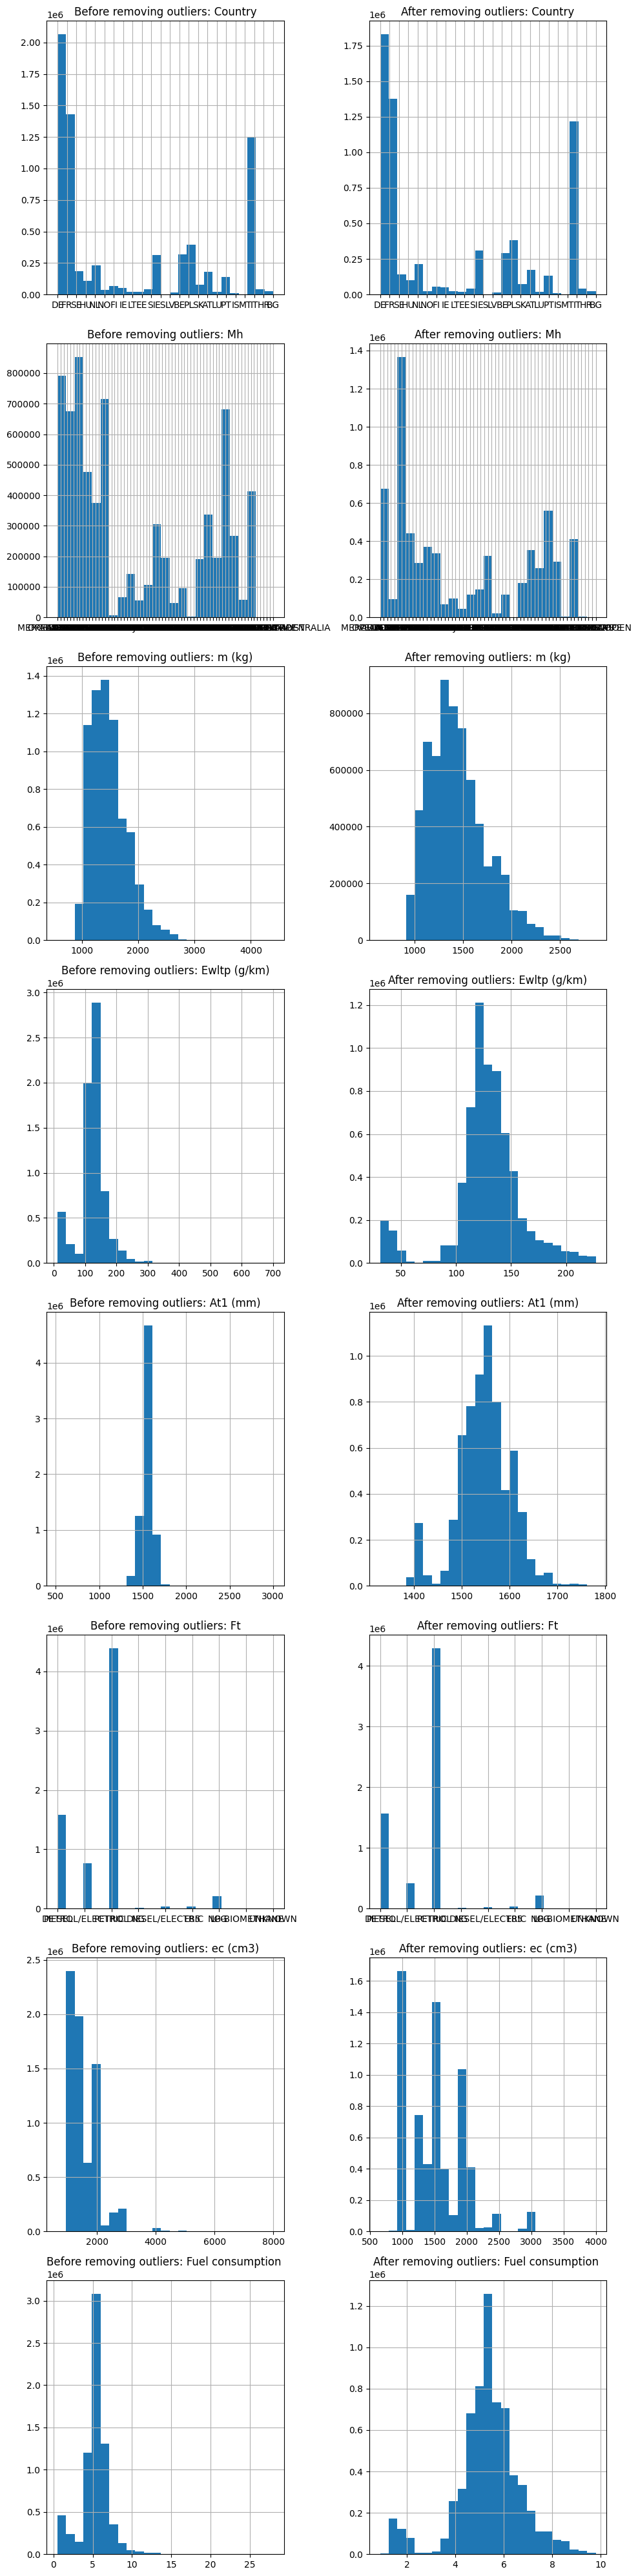

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(df_clean.columns), ncols=2, figsize=(10, 5*len(df_clean.columns)))

for i, col in enumerate(df_clean.columns):
    # Histogram before removing outliers
    df_clean[col].hist(bins=25, ax=axes[i, 0])
    axes[i, 0].set_title('Before removing outliers: ' + col)

    # Histogram after removing outliers
    df_clean_IQR[col].hist(bins=25, ax=axes[i, 1])
    axes[i, 1].set_title('After removing outliers: ' + col)

# Display the plots
plt.tight_layout()
plt.show()


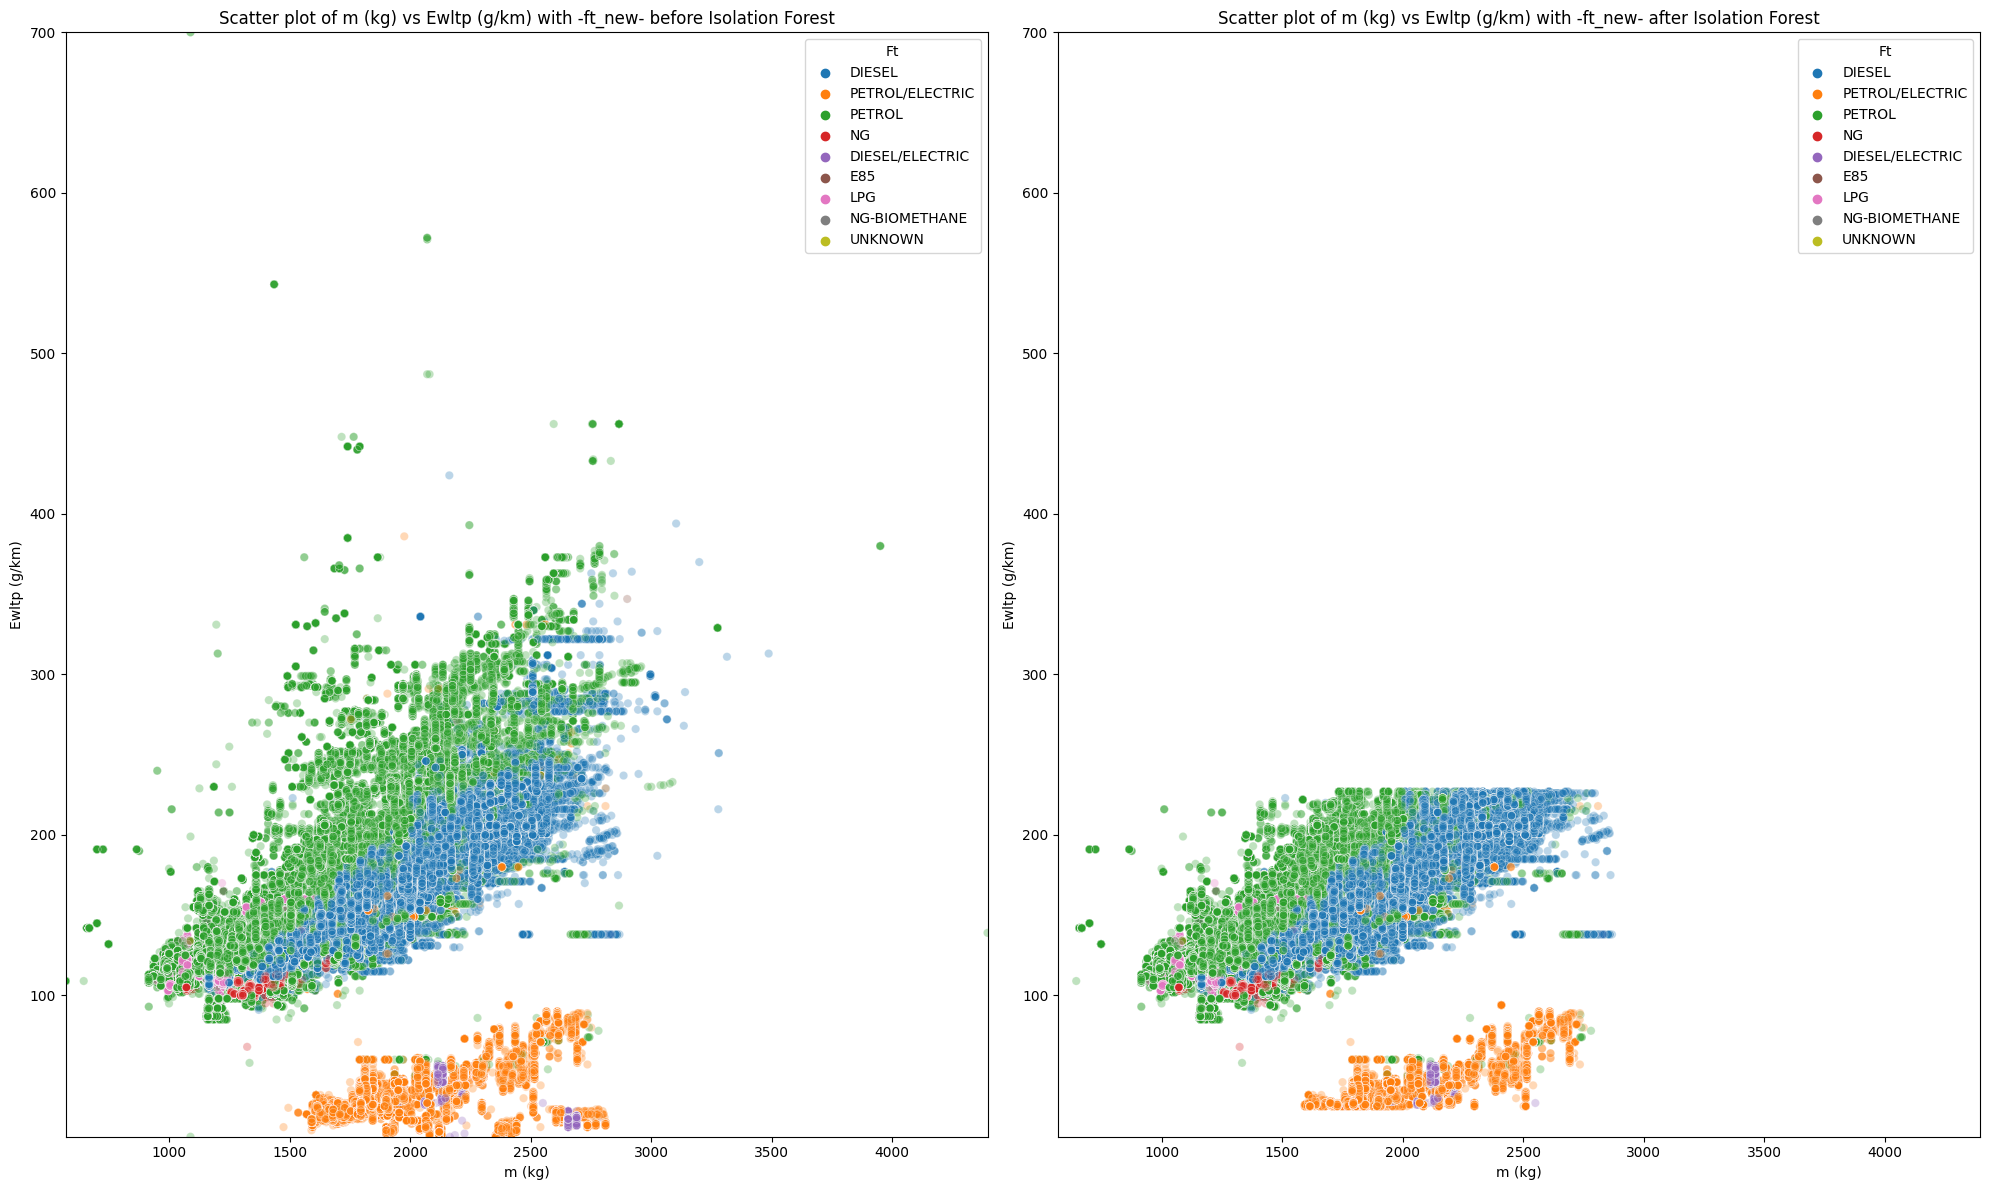

In [ ]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# create scatter plot for before data
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.3, ax=ax1)
ax1.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -ft_new- before Isolation Forest')

# create scatterplot for after Isolation Forest
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IQR, alpha=0.3, ax=ax2)
ax2.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -ft_new- after Isolation Forest')

# set limit for x- y-axes
xmin, xmax = min(df_clean['m (kg)'].min(), df_clean_IQR['m (kg)'].min()), max(df_clean['m (kg)'].max(), df_clean_IQR['m (kg)'].max())
ymin, ymax = min(df_clean['Ewltp (g/km)'].min(), df_clean_IQR['Ewltp (g/km)'].min()), max(df_clean['Ewltp (g/km)'].max(), df_clean_IQR['Ewltp (g/km)'].max())
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()

### 2.4.3 K-means Outlier Removal:

In [ ]:
# Assuming df_clean is your dataframe and you want to apply K-means on the 'm (kg)' column
X = df_clean[['m (kg)', 'Ewltp (g/km)', 'At1 (mm)', 'ec (cm3)',
       'Fuel consumption ']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
distances = kmeans.transform(X)
clustered = kmeans.labels_

# Calculate the distance of each point to its cluster centroid
dist_to_centroid = np.min(distances, axis=1)

# Define a threshold (here, 99th percentile of the distances)
threshold = np.percentile(dist_to_centroid, 99)

# Get the indices of the outliers
outliers = np.where(dist_to_centroid > threshold)[0]

print(outliers.size)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


70308


In [ ]:
print(outliers)

[  72179   72197   72223 ... 7048551 7048582 7048943]


In [ ]:
df_clean.iloc[5473860]

Country                  DE
Mh                   TOYOTA
m (kg)               1839.0
Ewltp (g/km)          189.0
At1 (mm)             1618.0
Ft                   DIESEL
ec (cm3)             1997.0
Fuel consumption        7.2
Name: 82058578, dtype: object

In [ ]:
# Remove outliers
df_clean_kmeans = df_clean.drop(df_clean.index[outliers], axis=0)


#### 2.4.3.2 After Kmeans

In [ ]:
df_clean_kmeans.describe()

m (kg)  Ewltp (g/km)      At1 (mm)      ec (cm3)  \
count  6.979910e+06  6.979910e+06  6.979910e+06  6.979910e+06   
mean   1.472400e+03  1.242617e+02  1.550571e+03  1.526976e+03   
std    3.091922e+02  4.036453e+01  5.563497e+01  4.696241e+02   
min    5.700000e+02  1.200000e+01  6.880000e+02  6.580000e+02   
25%    1.250000e+03  1.150000e+02  1.520000e+03  1.197000e+03   
50%    1.422000e+03  1.270000e+02  1.554000e+03  1.498000e+03   
75%    1.649000e+03  1.420000e+02  1.583000e+03  1.968000e+03   
max    2.860000e+03  7.000000e+02  2.500000e+03  3.799000e+03   

       Fuel consumption   
count       6.979910e+06  
mean        5.233365e+00  
std         1.653114e+00  
min         5.000000e-01  
25%         4.700000e+00  
50%         5.300000e+00  
75%         6.000000e+00  
max         2.800000e+01

In [ ]:
print('Before:',len(df_clean),'\n')
print('After IQR:',len(df_clean_IQR))
print('After Kmeans:',len(df_clean_kmeans),'\n')

print('diff Start - IQR:', len(df_clean) - len(df_clean_IQR))
print('diff Start - Kmeans',len(df_clean) - len(df_clean_kmeans))

Before: 7050218 

After IQR: 6569153
After Kmeans: 6979910 

diff Start - IQR: 481065
diff Start - Kmeans 70308


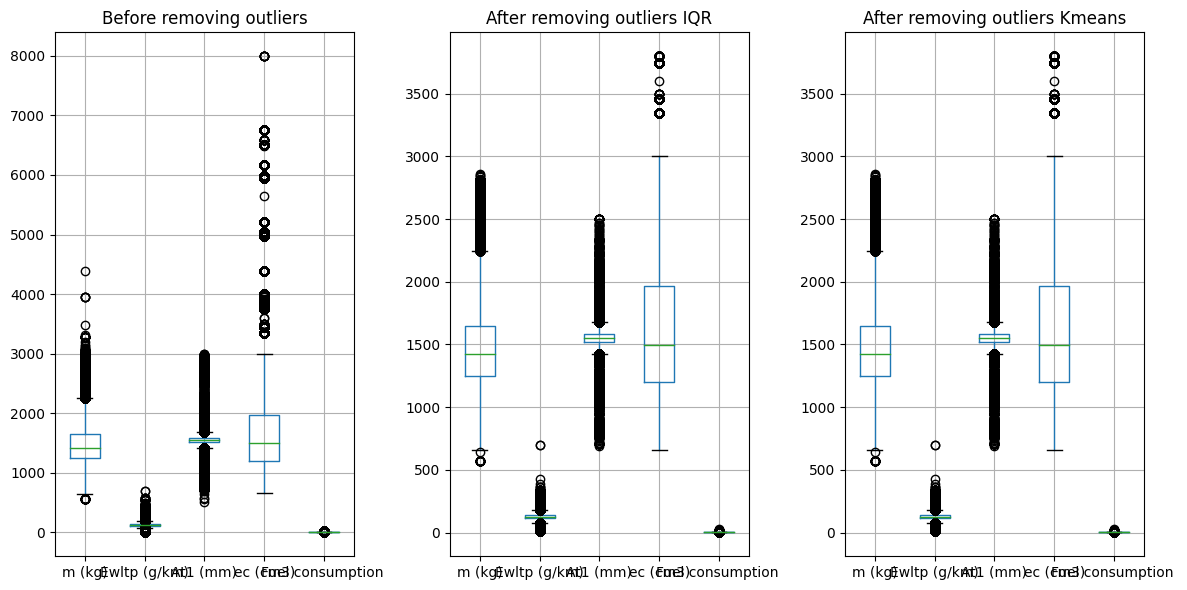

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

# Boxplot before removing outliers
df_clean.boxplot(ax=axes[0])
axes[0].set_title('Before removing outliers')

# Boxplot after removing outliers
df_clean_kmeans.boxplot(ax=axes[1])
axes[1].set_title('After removing outliers IQR')

# Boxplot after removing outliers
df_clean_kmeans.boxplot(ax=axes[2])
axes[2].set_title('After removing outliers Kmeans')

# Display the plots
plt.tight_layout()
plt.show()

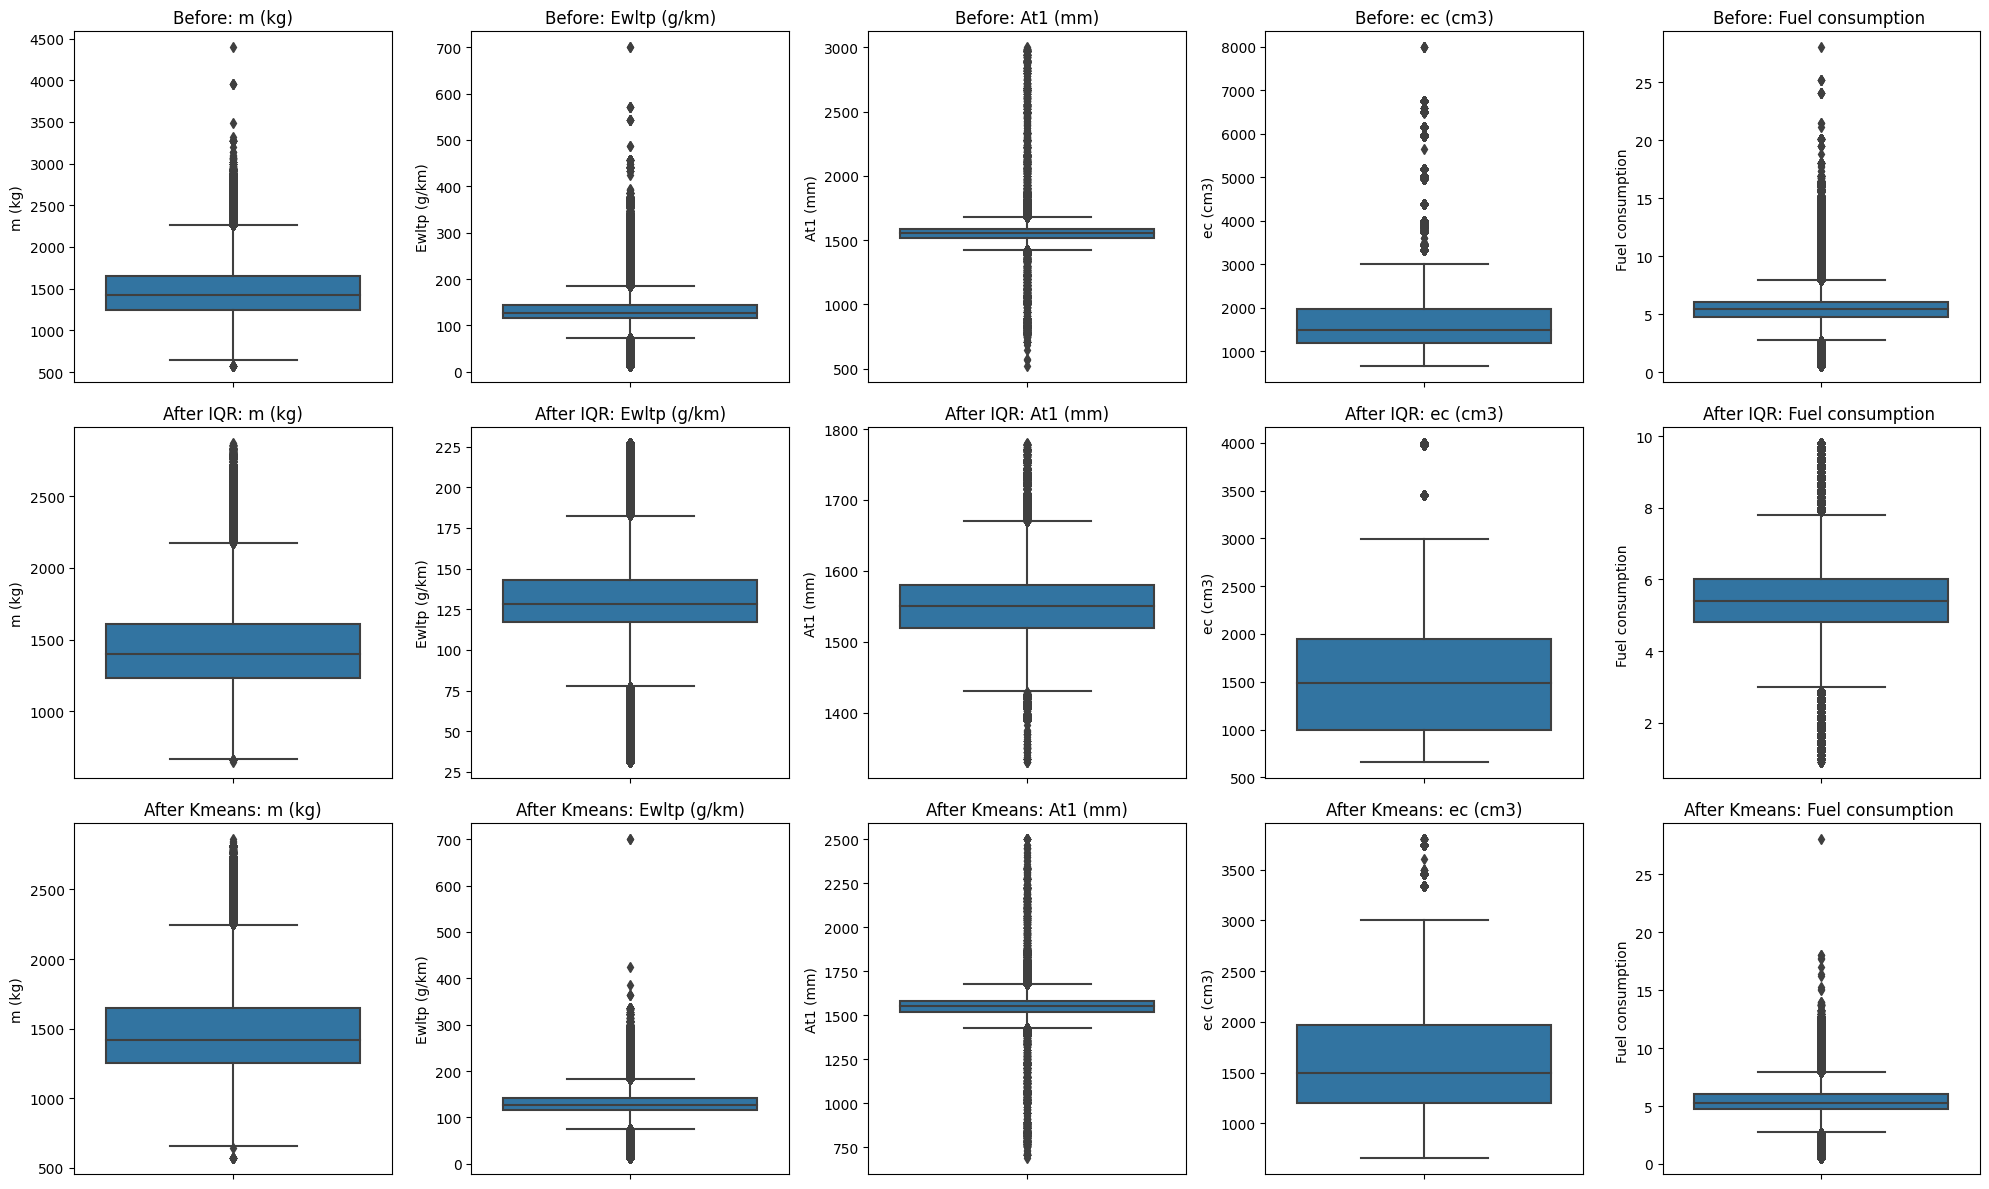

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=len(df_clean.select_dtypes(include=[np.number]).columns), figsize=(20,12))

for i, col in enumerate(df_clean.select_dtypes(include=[np.number]).columns):
    # Boxplot before removing outliers
    sns.boxplot(ax=axes[0, i], y=df_clean[col])
    axes[0, i].set_title('Before: ' + col)

    # Boxplot after removing outliers IQR
    sns.boxplot(ax=axes[1, i], y=df_clean_IQR[col])
    axes[1, i].set_title('After IQR: ' + col)

    # Boxplot after removing outliers Kmeans
    sns.boxplot(ax=axes[2, i], y=df_clean_kmeans[col])
    axes[2, i].set_title('After Kmeans: ' + col)

plt.tight_layout()
plt.show()

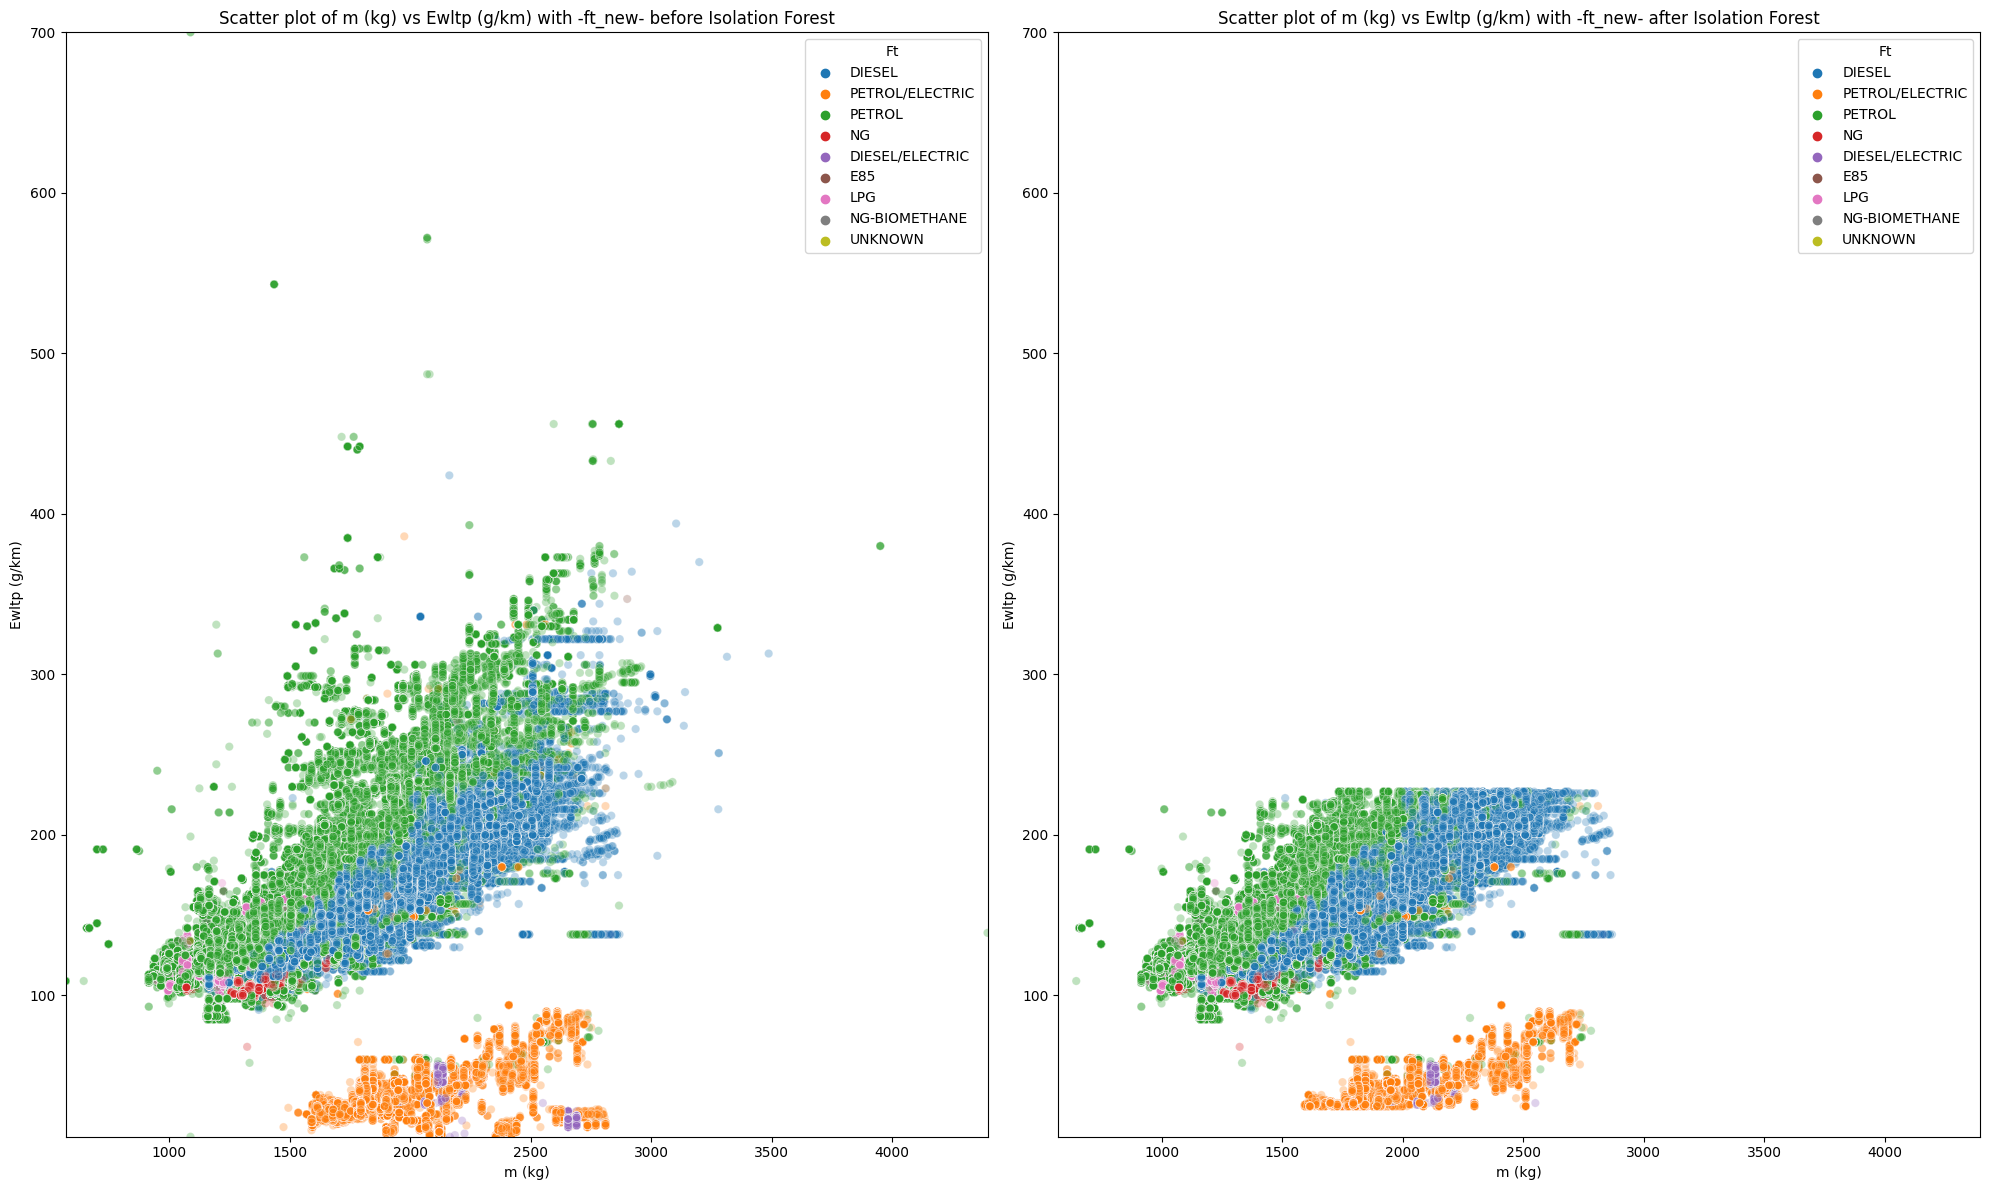

In [ ]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# create scatter plot for before data
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.3, ax=ax1)
ax1.set_title('Scatter plot of m (kg) vs Ewltp (g/km) before th Ft - after Kmeans')

# create scatterplot for after Isolation Forest
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IQR, alpha=0.3, ax=ax2)
ax2.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with Ft - after Kmeans')

# set limit for x- y-axes
xmin, xmax = min(df_clean['m (kg)'].min(), df_clean_kmeans['m (kg)'].min()), max(df_clean['m (kg)'].max(), df_clean_kmeans['m (kg)'].max())
ymin, ymax = min(df_clean['Ewltp (g/km)'].min(), df_clean_kmeans['Ewltp (g/km)'].min()), max(df_clean['Ewltp (g/km)'].max(), df_clean_kmeans['Ewltp (g/km)'].max())
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()

### 2.4.4 isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

df_clean_non_num = df_clean.select_dtypes(exclude=[np.number])
df_clean_num = df_clean.select_dtypes(include=[np.number])

# create model
clf = IsolationForest(random_state=0, contamination=0.1) #contamination paramenter = 10%

# train model
clf.fit(df_clean_num)

# prediction
pred = clf.predict(df_clean_num)

# prediction to df
df_clean_num['outliers'] = pred

#remove outlier
df_clean_IF = pd.concat([df_clean_num, df_clean_non_num], axis=1)
df_clean_IF = df_clean_IF[df_clean_IF['outliers'] == 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df_clean_IF['outliers'].value_counts()

1    6345893
Name: outliers, dtype: int64

In [ ]:
print('Before               :',len(df_clean),'\n')
print('After IQR            :',len(df_clean_IQR))
print('After Kmeans         :',len(df_clean_kmeans))
print('After IF             :',len(df_clean_IF),'\n')

print('diff Start - IQR     :', len(df_clean) - len(df_clean_IQR))
print('diff Start - Kmeans  :',len(df_clean) - len(df_clean_kmeans))
print('diff Start - IsoFor  :',len(df_clean) - len(df_clean_IF))

Before               : 7050218 

After IQR            : 6569153
After Kmeans         : 6979910
After IF             : 6345893 

diff Start - IQR     : 481065
diff Start - Kmeans  : 70308
diff Start - IsoFor  : 704325


#### IF with 10%  

In [ ]:
df_clean_IF.describe()

In [ ]:
df_clean_IF.head()

m (kg)  Ewltp (g/km)  At1 (mm)  ec (cm3)  Fuel consumption   \
ID                                                                      
80960002  1780.0         149.0    1603.0    1968.0                5.7   
80960004  1780.0         148.0    1603.0    1968.0                5.7   
80960005  1780.0         174.0    1603.0    1984.0                7.7   
80960008  1785.0         174.0    1603.0    1984.0                7.7   
80960009  1845.0         153.0    1603.0    1968.0                5.8   

          outliers Country       Mh      Ft  
ID                                           
80960002         1      DE  AUDI AG  DIESEL  
80960004         1      DE  AUDI AG  DIESEL  
80960005         1      DE  AUDI AG  PETROL  
80960008         1      DE  AUDI AG  PETROL  
80960009         1      DE  AUDI AG  DIESEL

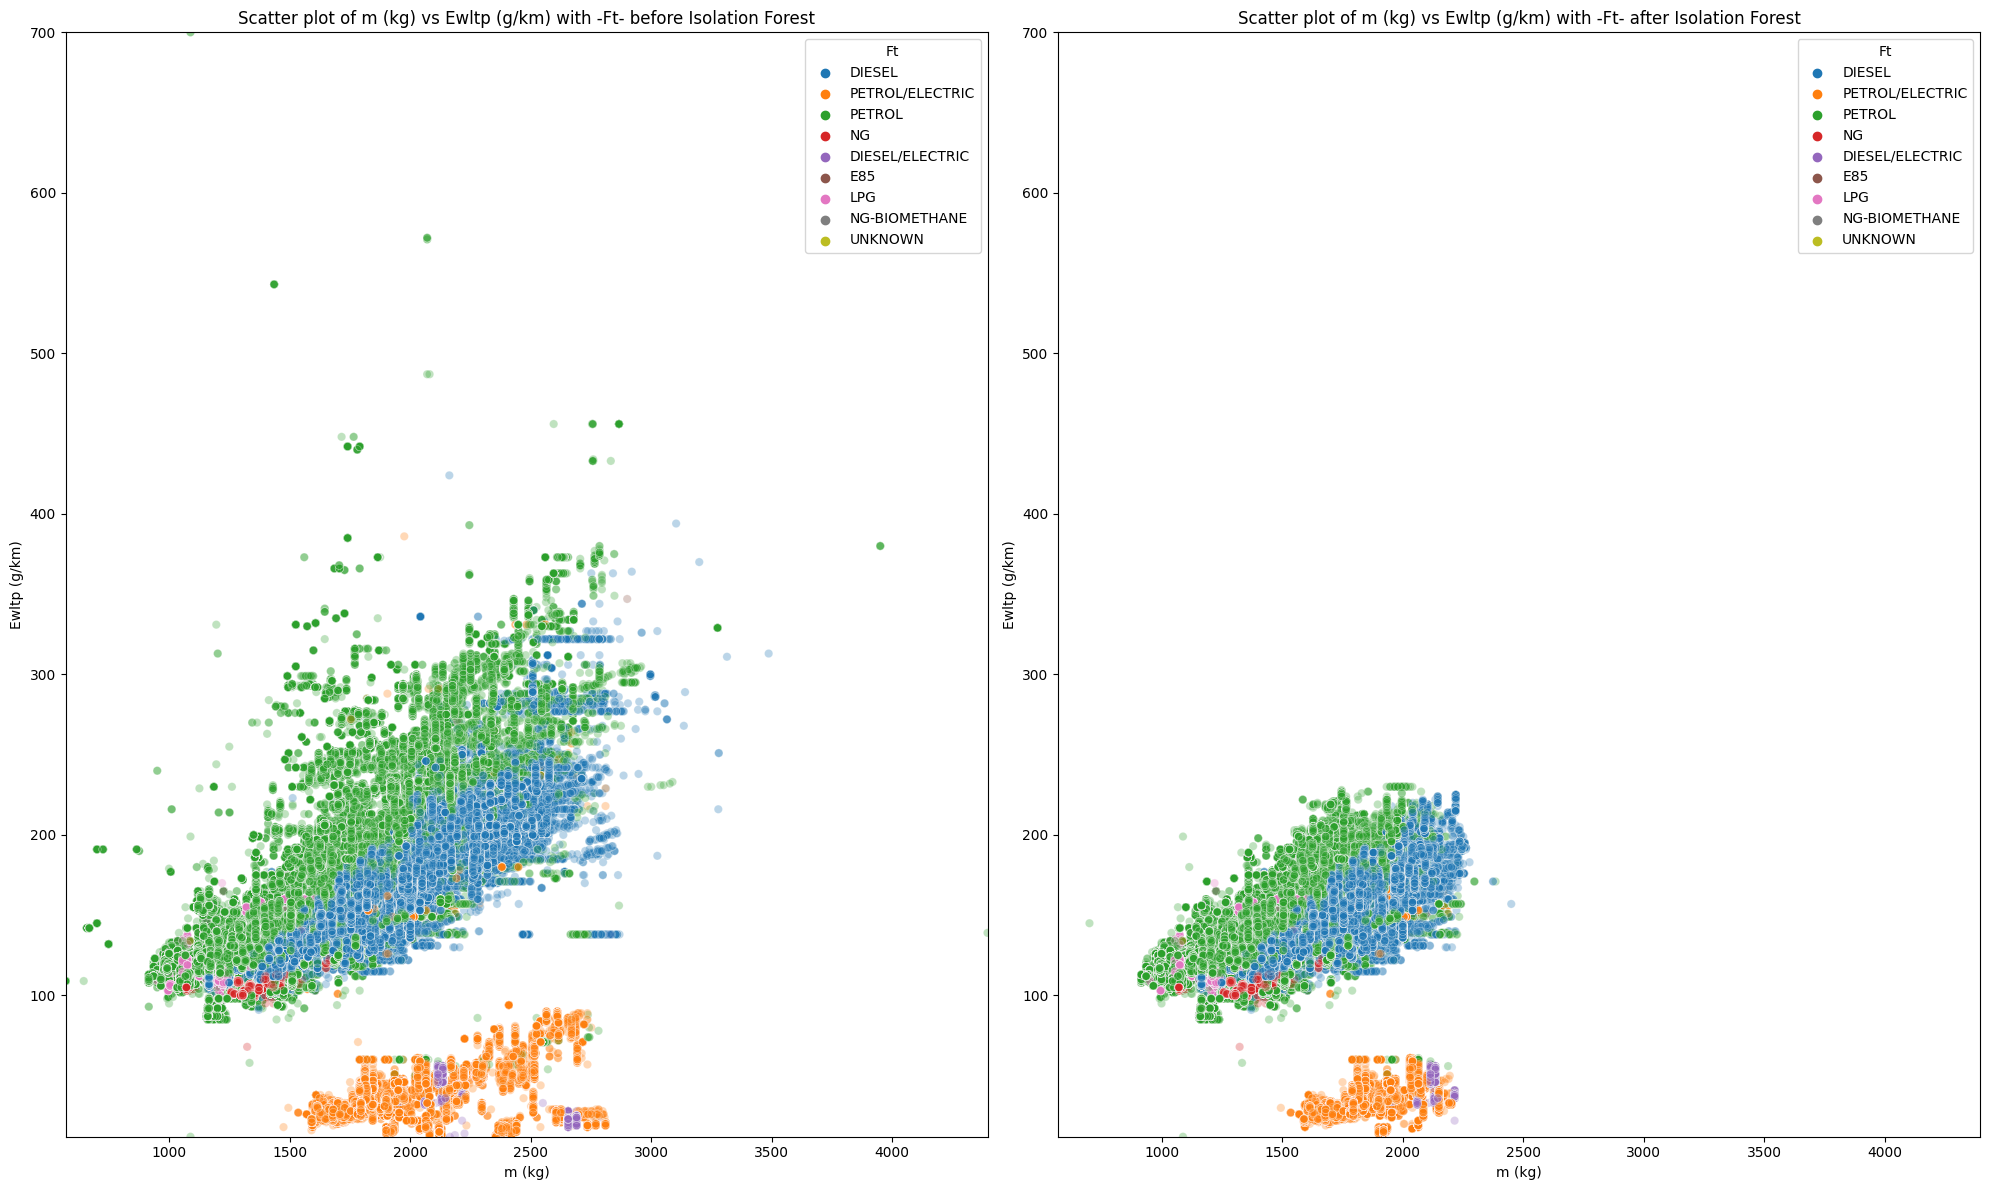

In [ ]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# create scatter plot for before data
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.3, ax=ax1)
ax1.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- before Isolation Forest')

# create scatterplot for after Isolation Forest
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IF, alpha=0.3, ax=ax2)
ax2.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- after Isolation Forest')

# set limit for x- y-axes
xmin, xmax = min(df_clean['m (kg)'].min(), df_clean_IF['m (kg)'].min()), max(df_clean['m (kg)'].max(), df_clean_IF['m (kg)'].max())
ymin, ymax = min(df_clean['Ewltp (g/km)'].min(), df_clean_IF['Ewltp (g/km)'].min()), max(df_clean['Ewltp (g/km)'].max(), df_clean_IF['Ewltp (g/km)'].max())
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()

#### 2.4.4.1 adjust IF (5% contamination)


In [ ]:
# create model
clf = IsolationForest(n_estimators=200,
                      max_samples='auto',
                      contamination=(0.05),
                      max_features=1.0,
                      bootstrap=False,
                      random_state=0)

# train model
clf.fit(df_clean_num)

# prediction
pred = clf.predict(df_clean_num)

# prediction to df
df_clean_num['outliers'] = pred

#remove outlier
df_clean_IF2 = pd.concat([df_clean_num, df_clean_non_num], axis=1)
df_clean_IF2 = df_clean_IF[df_clean_IF['outliers'] == 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
df_clean_IF2['outliers'].value_counts()

1    6345893
Name: outliers, dtype: int64

In [ ]:
print('Before               :',len(df_clean),'\n')
print('After IQR            :',len(df_clean_IQR))
print('After Kmeans         :',len(df_clean_kmeans))
print('After IF             :',len(df_clean_IF),'\n')
print('After IF             :',len(df_clean_IF2),'\n')

print('diff Start - IQR     :', len(df_clean) - len(df_clean_IQR))
print('diff Start - Kmeans  :',len(df_clean) - len(df_clean_kmeans))
print('diff Start - IsoFor  :',len(df_clean) - len(df_clean_IF))
print('diff Start - IsoFor  :',len(df_clean) - len(df_clean_IF2))

Before               : 7050215 

After IQR            : 6569153
After Kmeans         : 6979910
After IF             : 6345893 

After IF             : 6345893 

diff Start - IQR     : 481062
diff Start - Kmeans  : 70305
diff Start - IsoFor  : 704322
diff Start - IsoFor  : 704322


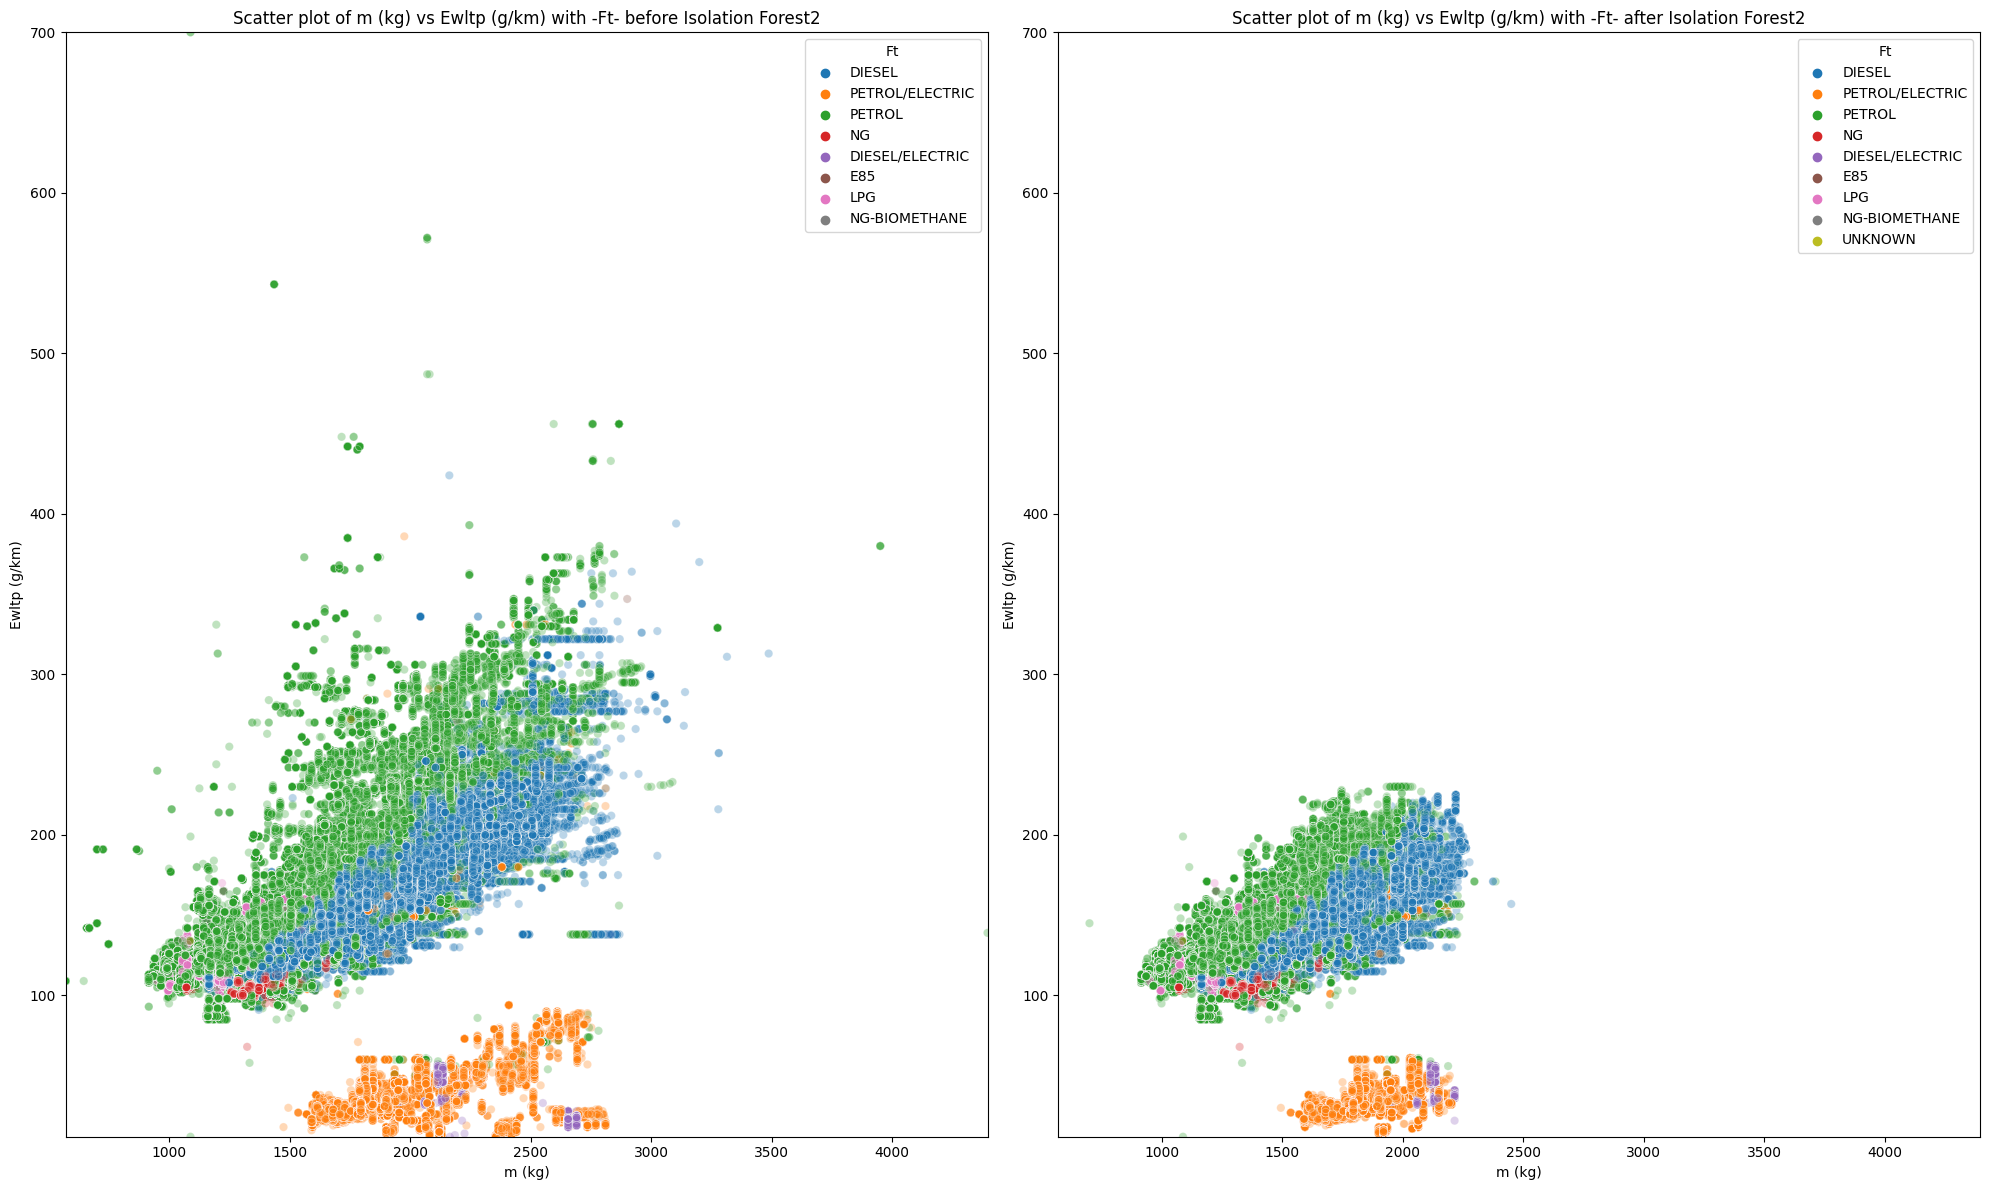

In [ ]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# create scatter plot for before data
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.3, ax=ax1)
ax1.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- before Isolation Forest2')

# create scatterplot for after Isolation Forest
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IF2, alpha=0.3, ax=ax2)
ax2.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- after Isolation Forest2')

# set limit for x- y-axes
xmin, xmax = min(df_clean['m (kg)'].min(), df_clean_IF2['m (kg)'].min()), max(df_clean['m (kg)'].max(), df_clean_IF2['m (kg)'].max())
ymin, ymax = min(df_clean['Ewltp (g/km)'].min(), df_clean_IF2['Ewltp (g/km)'].min()), max(df_clean['Ewltp (g/km)'].max(), df_clean_IF2['Ewltp (g/km)'].max())
ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])
ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()

### 2.4.5 Compare

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Create scatter plot -> before data
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.3, ax=axs[0,0])
axs[0,0].set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- before Isolation Forest')

# Create scatterplot -> after Isolation Forest
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IF, alpha=0.3, ax=axs[0,1])
axs[0,1].set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- after Isolation Forest')

# Create scatterplot -> after IQR
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_IQR, alpha=0.3, ax=axs[1,0])
axs[1,0].set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- after IQR')

# Create scatterplot -> after Kmeans
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_kmeans, alpha=0.3, ax=axs[1,1])
axs[1,1].set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -Ft- after Kmeans')

plt.tight_layout()
plt.show()



In [ ]:
print('Before               :',len(df_clean),'\n')
print('After IQR            :',len(df_clean_IQR))
print('After Kmeans         :',len(df_clean_kmeans))
print('After IF             :',len(df_clean_IF),'\n')

print('diff Start - IQR     :', len(df_clean) - len(df_clean_IQR))
print('diff Start - Kmeans  :',len(df_clean) - len(df_clean_kmeans))
print('diff Start - IsoFor  :',len(df_clean) - len(df_clean_IF))

Before               : 7050215 

After IQR            : 6569153
After Kmeans         : 6979910
After IF             : 5661514 

diff Start - IQR     : 481062
diff Start - Kmeans  : 70305
diff Start - IsoFor  : 1388701


#### 2.4.5.1 Compare Boxplot all

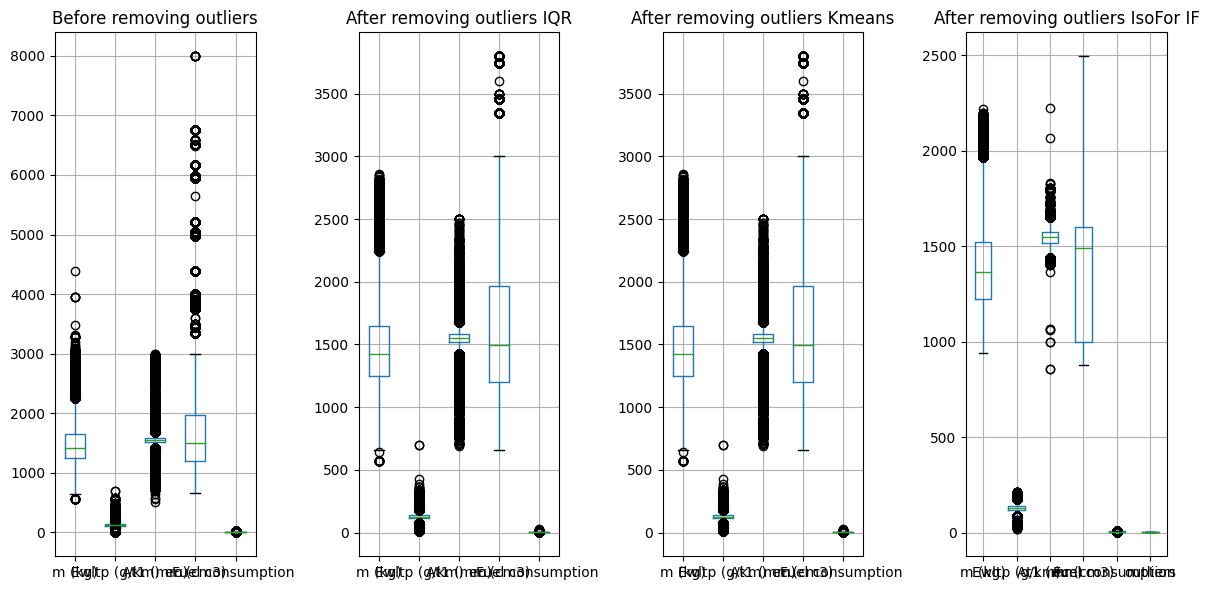

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6))

# Boxplot before removing outliers
df_clean.boxplot(ax=axes[0])
axes[0].set_title('Before removing outliers')

# Boxplot after removing outliers
df_clean_kmeans.boxplot(ax=axes[1])
axes[1].set_title('After removing outliers IQR')

# Boxplot after removing outliers
df_clean_kmeans.boxplot(ax=axes[2])
axes[2].set_title('After removing outliers Kmeans')

# Boxplot after removing outliers
df_clean_IF.boxplot(ax=axes[3])
axes[3].set_title('After removing outliers IsoFor IF')

# Display the plots
plt.tight_layout()
plt.show()

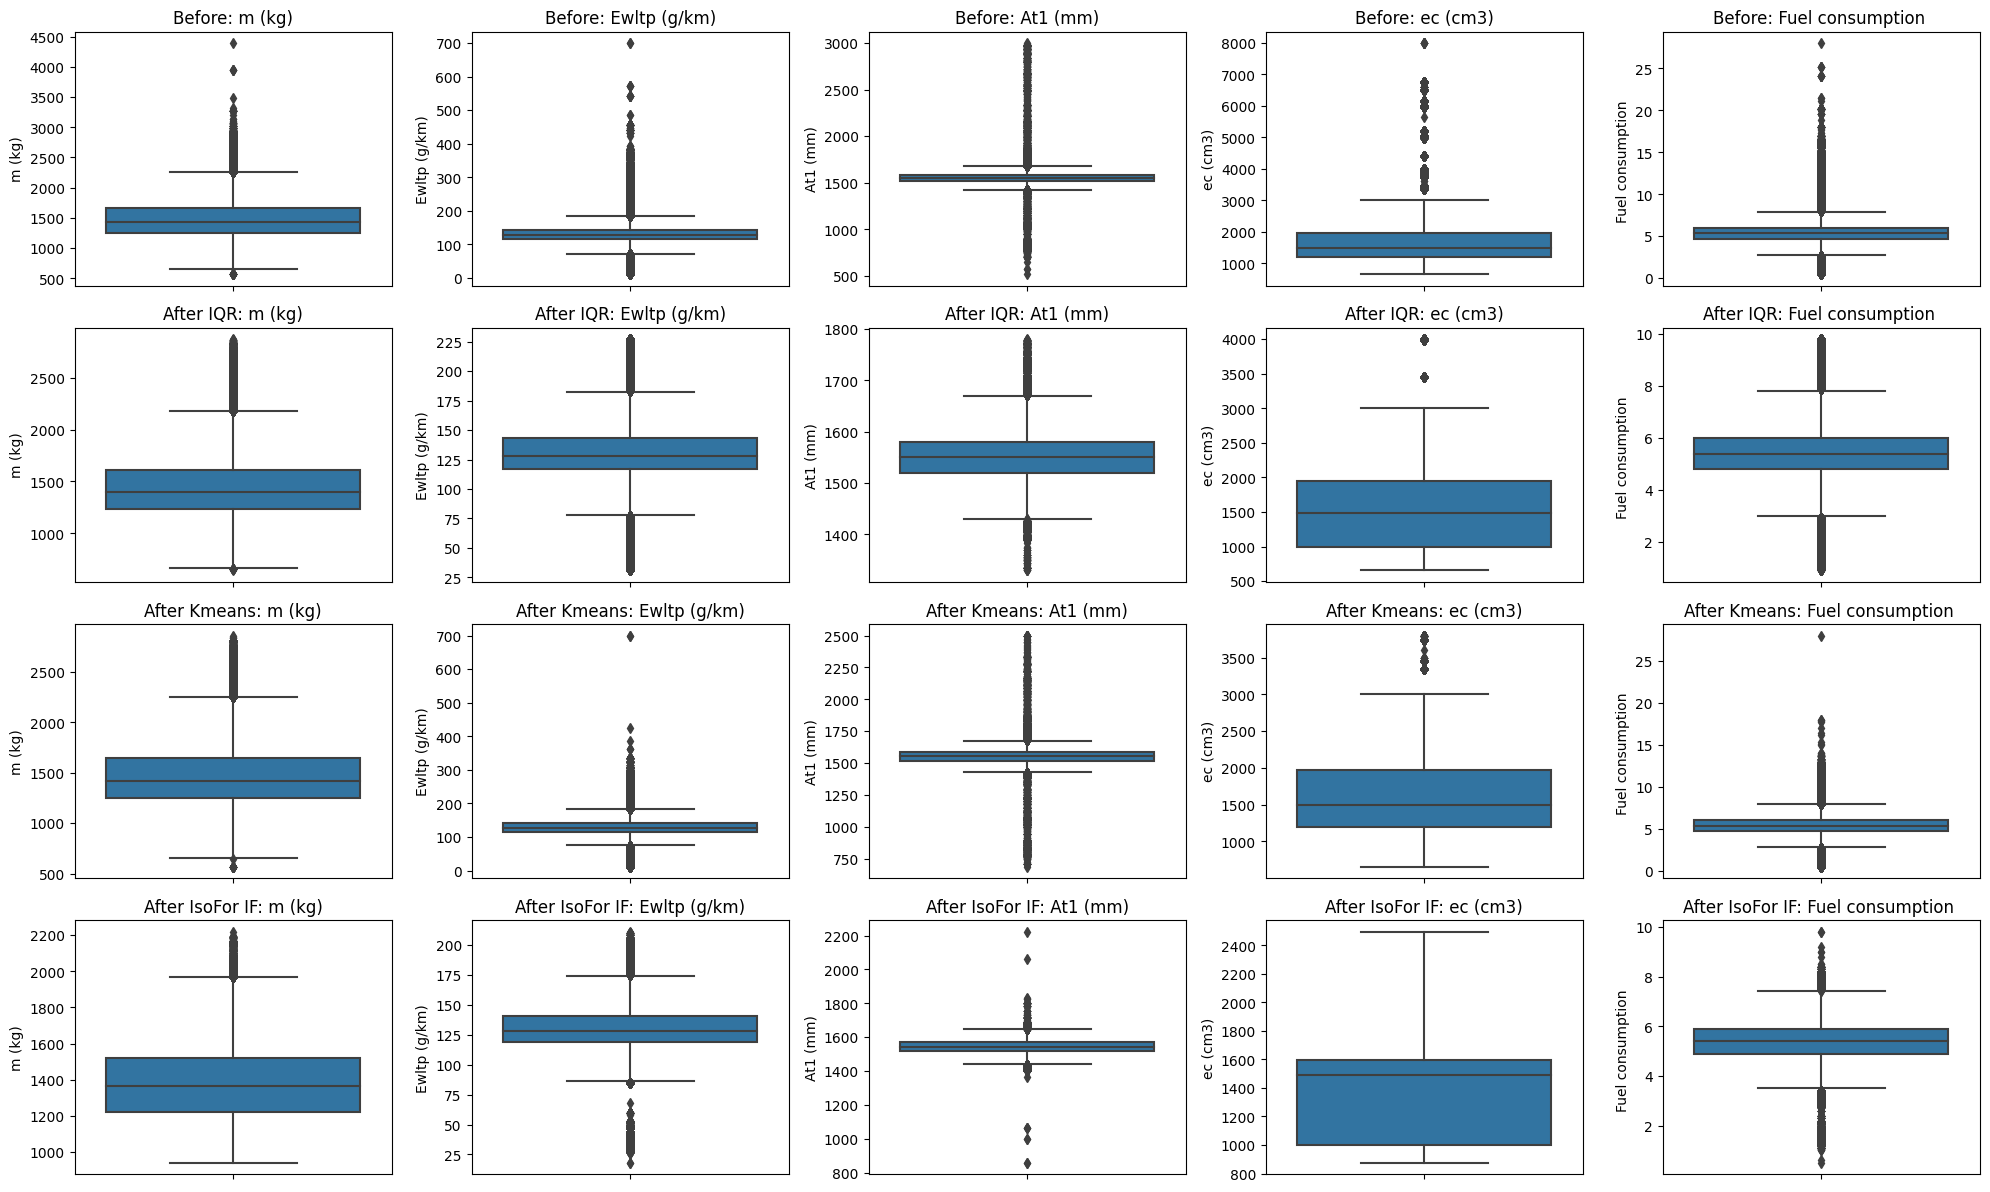

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=4, ncols=len(df_clean.select_dtypes(include=[np.number]).columns), figsize=(20,12))

for i, col in enumerate(df_clean.select_dtypes(include=[np.number]).columns):
    # Boxplot before removing outliers
    sns.boxplot(ax=axes[0, i], y=df_clean[col])
    axes[0, i].set_title('Before: ' + col)

    # Boxplot after removing outliers IQR
    sns.boxplot(ax=axes[1, i], y=df_clean_IQR[col])
    axes[1, i].set_title('After IQR: ' + col)

    # Boxplot after removing outliers Kmeans
    sns.boxplot(ax=axes[2, i], y=df_clean_kmeans[col])
    axes[2, i].set_title('After Kmeans: ' + col)

    # Boxplot after removing outliers IsoFor
    sns.boxplot(ax=axes[3, i], y=df_clean_IF[col])
    axes[3, i].set_title('After IsoFor IF: ' + col)

plt.tight_layout()
plt.show()

## 2.5 Encoding

We dont need `Country` and `Mh` no particular pattern is recognizable the greatest influence has `Ft`

In [ ]:
for col in ['Country', 'Mh', 'Ft']:
    print(f"{col}: {df_clean[col].nunique()}")

Country: 24
Mh: 69
Ft: 9


### 2.5.1 Fuel Type categorization

1. **Fossil Fuels:** These are derived from the remains of ancient plants and animals buried and subjected to heat and pressure over millions of years. They are non-renewable and contribute to greenhouse gas emissions.

>- **Petrol** (Gasoline): It’s a transparent, petroleum-derived liquid that is used primarily as a fuel in internal combustion engines.
>- **Diesel**: It’s a type of fuel derived from crude oil and is used in diesel engines.
>- **LPG (Liquefied Petroleum Gas):** It’s a flammable hydrocarbon gas that is used as fuel in heating appliances, cooking equipment, and vehicles.

2. **Alternative Fuels:** These are derived from resources other than petroleum and are produced domestically, reducing our dependence on imported oil and some are derived from renewable sources.

>- **E85:** It’s a blend of 85% ethanol and 15% gasoline, used in internal combustion engines designed to run on ethanol.
>- **NG (Natural Gas):** It’s a naturally occurring hydrocarbon gas mixture consisting primarily of methane. It’s used as a fuel in natural gas-powered vehicles.
>- **NG-Biomethane:** Biomethane is a naturally occurring gas which is produced by the anaerobic digestion of organic matter– agricultural waste, manure, municipal waste, plant material, etc.

3. **Hybrid Fuels:** These are used in hybrid vehicles that combine an internal combustion engine and one or more electric motors.

>- **Petrol/Electric:** These vehicles use both petrol and electricity as fuel sources.
>- **Diesel/Electric:** These vehicles use both diesel and electricity as fuel sources.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


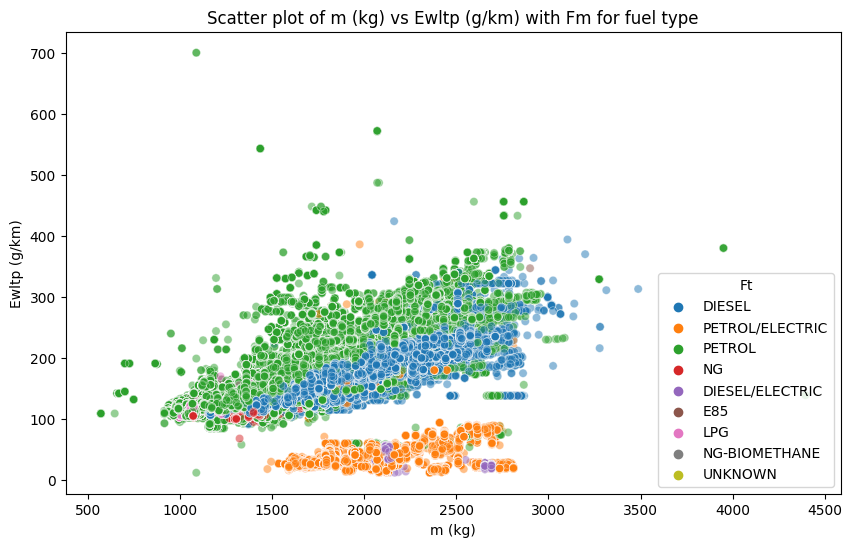

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean, alpha=0.5)
plt.title('Scatter plot of m (kg) vs Ewltp (g/km) with Fm for fuel type')
plt.show()

In [ ]:
df_clean = df_clean[df_clean['Ft'] != 'UNKNOWN'] #hydrogen &electric

# Categorie ft_new
def categorize(value):
    if value in ['DIESEL']:
        return 'Diesel'
    if value in ['PETROL']:
      return 'Petrol'
    elif value in ['PETROL/ELECTRIC', 'DIESEL/ELECTRIC']:
        return 'Hybrid'
    elif value in ['LPG', 'E85', 'NG', 'NG-BIOMETHANE']:
        return 'Alternative Fuel'
    else:
        return 'Other'

df_clean['ft_new'] = df_clean['Ft'].apply(categorize)

df_clean.head()

Country       Mh  m (kg)  Ewltp (g/km)  At1 (mm)               Ft  \
ID                                                                           
80960000      DE  AUDI AG  2095.0         191.0    1603.0           DIESEL   
80960001      DE  AUDI AG  1910.0         179.0    1603.0           DIESEL   
80960002      DE  AUDI AG  1780.0         149.0    1603.0           DIESEL   
80960003      DE  AUDI AG  2150.0          35.0    1603.0  PETROL/ELECTRIC   
80960004      DE  AUDI AG  1780.0         148.0    1603.0           DIESEL   

          ec (cm3)  Fuel consumption   ft_new  
ID                                             
80960000    2967.0                7.3  Diesel  
80960001    2967.0                6.8  Diesel  
80960002    1968.0                5.7  Diesel  
80960003    1984.0                1.5  Hybrid  
80960004    1968.0                5.7  Diesel

In [ ]:
alternative_fuel = ['LPG', 'E85', 'NG', 'NG-BIOMETHANE']

df_clean_filtered = df_clean[df_clean['Ft'].isin(alternative_fuel)]

In [ ]:
print('Fueltypes:\n', df_clean['Ft'].value_counts(),'\n')

print('ft_new:\n', df_clean['ft_new'].value_counts())

In [ ]:
df_clean.groupby(['ft_new']).size().sort_values(ascending=False) / len(df_clean)

ft_new
Petrol              0.623494
Diesel              0.224825
Hybrid              0.113441
Alternative Fuel    0.038240
dtype: float64

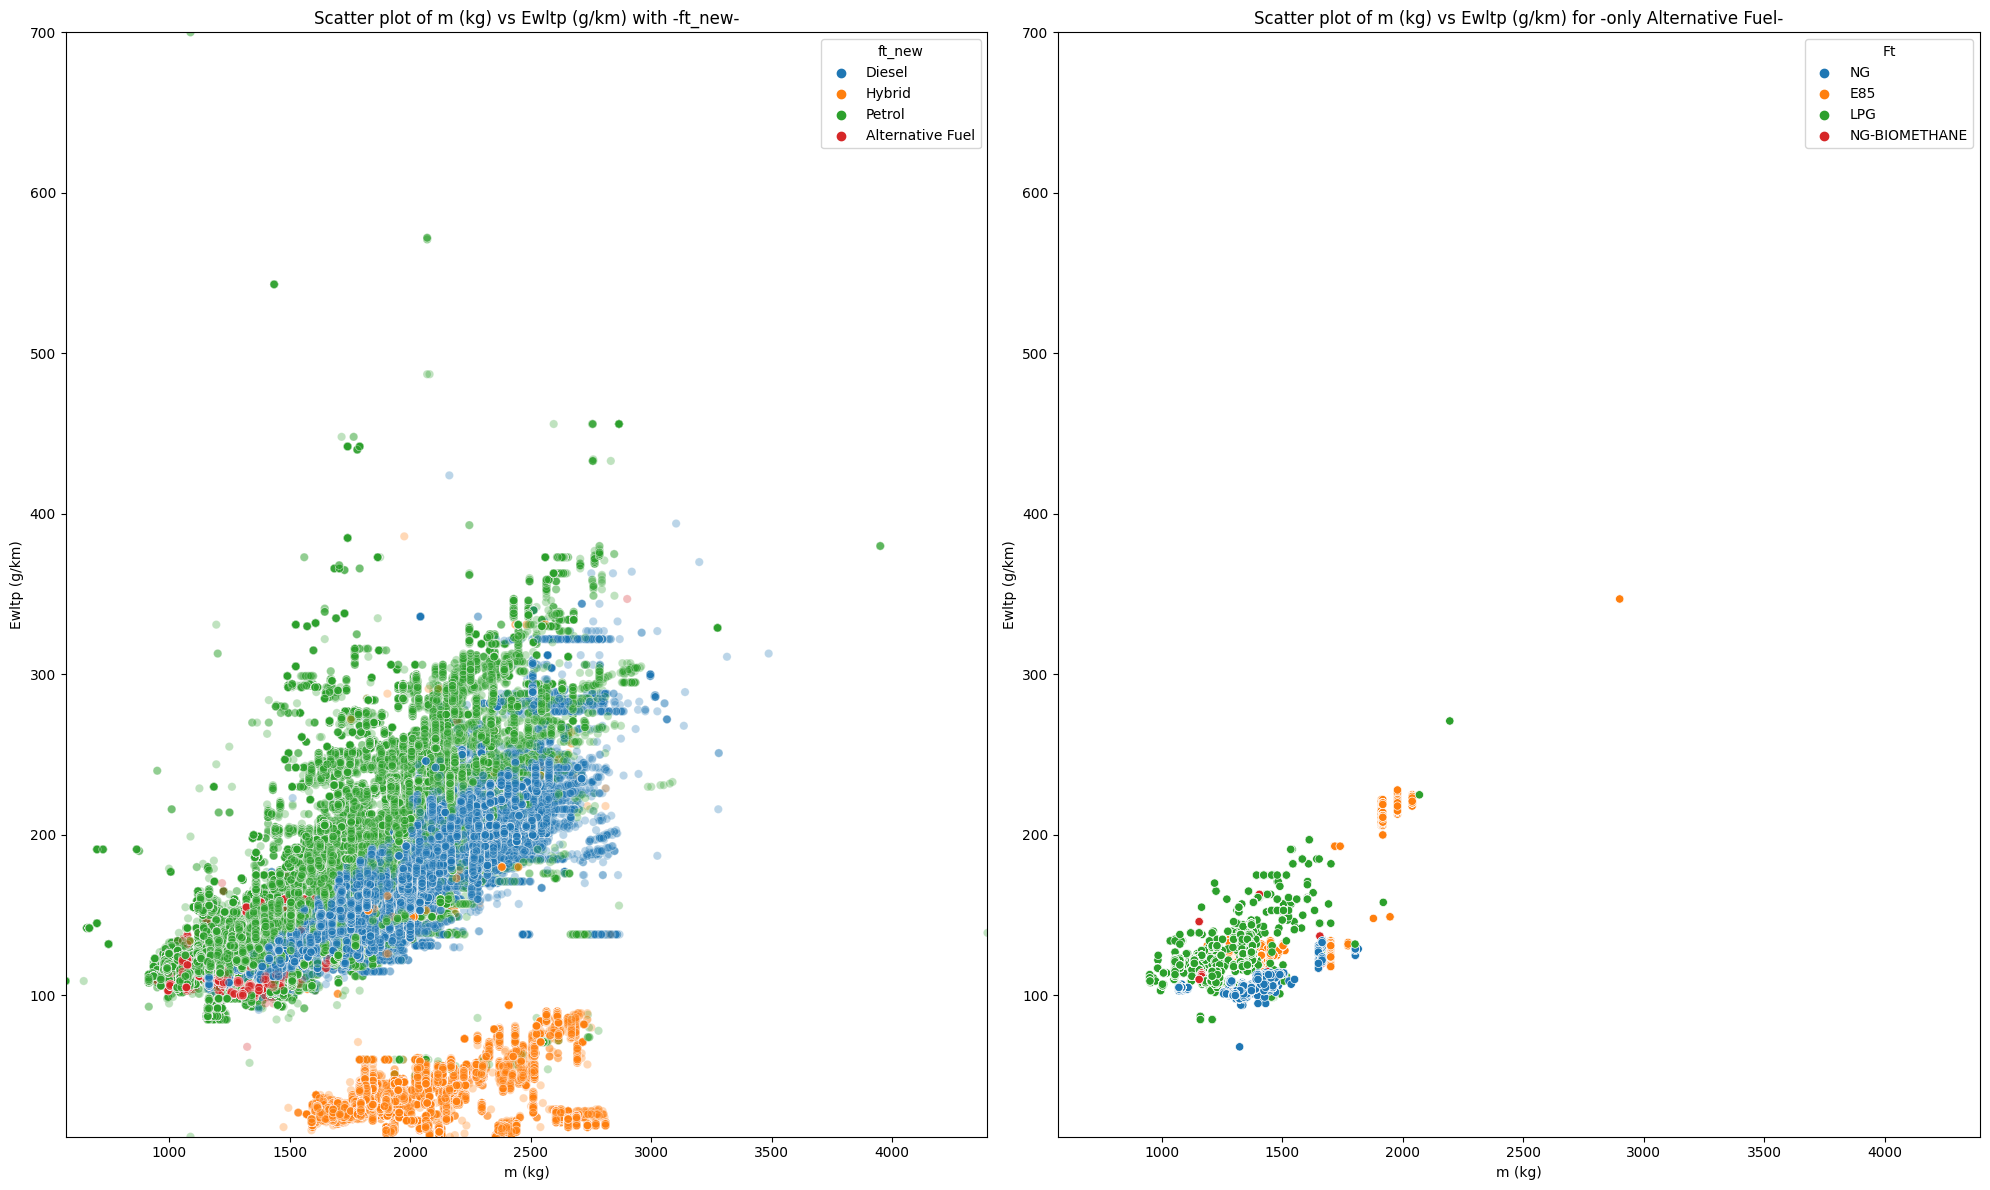

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="ft_new", data=df_clean, alpha=0.2, ax=ax1)
ax1.set_title('Scatter plot of m (kg) vs Ewltp (g/km) with -ft_new-')

sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Ft", data=df_clean_filtered, ax=ax2)
ax2.set_title('Scatter plot of m (kg) vs Ewltp (g/km) for -only Alternative Fuel-')

# Set the limits of the x and y axes for both plots
x_min = min(df_clean["m (kg)"].min(), df_clean_filtered["m (kg)"].min())
x_max = max(df_clean["m (kg)"].max(), df_clean_filtered["m (kg)"].max())
y_min = min(df_clean["Ewltp (g/km)"].min(), df_clean_filtered["Ewltp (g/km)"].min())
y_max = max(df_clean["Ewltp (g/km)"].max(), df_clean_filtered["Ewltp (g/km)"].max())

ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])
ax2.set_xlim([x_min, x_max])
ax2.set_ylim([y_min, y_max])

plt.tight_layout()

plt.tight_layout()
plt.show()

In [ ]:
df_clean = df_clean.drop('Ft', axis=1)

### 2.5.2 `Country`

>as you can see in the scatterplot it's the same distribution as in the `Ft` Scatterplot Distribution. The Fuel Types have the bigger impact. -> get rif of `Counutry`


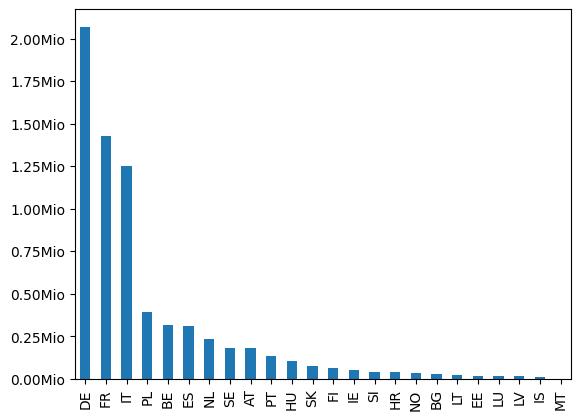

In [ ]:
import matplotlib.ticker as mtick

df_clean['Country'].value_counts().plot(kind='bar')

# Create a function that converts x to millions
fmt = lambda x, pos: '{:.2f}Mio'.format(x*1e-6)

# Apply the function to the y-axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(fmt))

plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


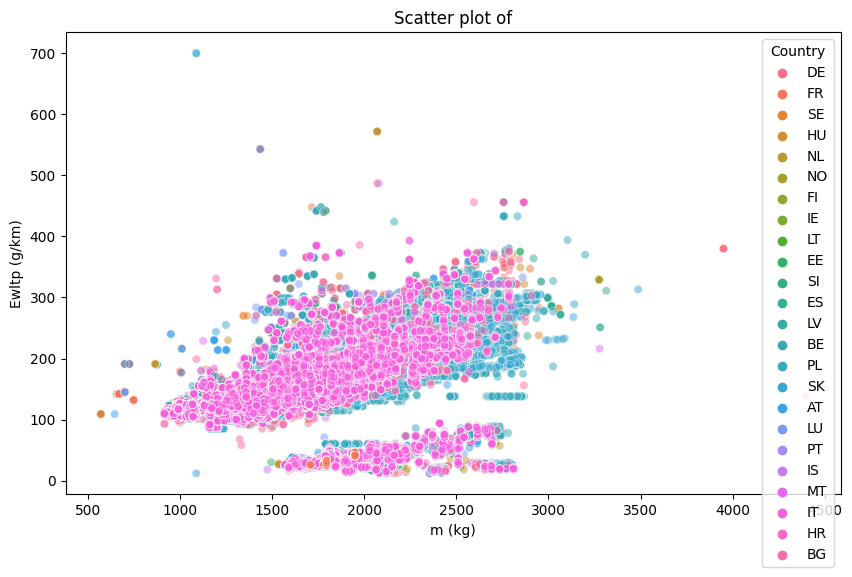

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Country", data=df_clean, alpha=0.5)
plt.title('Scatter plot of')
plt.show()

### 2.5.3 `Mh` Manufacturer name EU standard denomination

>as you can see in the scatterplot it's the same distribution as in the `Ft` Scatterplot Distribution. The Fuel Types have the bigger impact. -> get rif of `Mh`

In [ ]:
df_clean.head()

Country       Mh  m (kg)  Ewltp (g/km)  At1 (mm)               Ft  \
ID                                                                           
80960000      DE  AUDI AG  2095.0         191.0    1603.0           DIESEL   
80960001      DE  AUDI AG  1910.0         179.0    1603.0           DIESEL   
80960002      DE  AUDI AG  1780.0         149.0    1603.0           DIESEL   
80960003      DE  AUDI AG  2150.0          35.0    1603.0  PETROL/ELECTRIC   
80960004      DE  AUDI AG  1780.0         148.0    1603.0           DIESEL   

          ec (cm3)  Fuel consumption   
ID                                     
80960000    2967.0                7.3  
80960001    2967.0                6.8  
80960002    1968.0                5.7  
80960003    1984.0                1.5  
80960004    1968.0                5.7

In [ ]:
print(df_clean['Mh'].unique())


['AUDI AG' 'AA-IVA' 'MERCEDES-BENZ AG' 'ALPINA' 'OPEL AUTOMOBILE' 'PSA'
 'AUDI SPORT' 'VOLKSWAGEN' 'DUPLICATE' 'BMW AG' 'BMW GMBH'
 'FORD WERKE GMBH' 'MERCEDES AMG' 'PORSCHE' 'TOYOTA' 'DONKERVOORT'
 'FIAT GROUP' 'FERRARI' 'LAMBORGHINI' 'MASERATI' 'DR AUTOMOBILES'
 'CHRYSLER' 'FORD MOTOR COMPANY' 'GENERAL MOTORS HOLDINGS' 'VOLVO'
 'SUBARU' 'HONDA MOTOR CO' 'MAZDA EUROPE' 'MITSUBISHI MOTORS CORPORATION'
 'MAZDA' 'NISSAN AUTOMOTIVE EUROPE' 'SUZUKI MOTOR CORPORATION'
 'TOYOTA MOTOR CORPORATION' 'HYUNDAI' 'KIA' 'GEELY'
 'SAIC MOTOR CORPORATION' 'AA-NSS' 'MITSUBISHI MOTORS THAILAND'
 'HYUNDAI ASSAN' 'MCLAREN' 'BENTLEY' 'ASTON MARTIN' 'CATERHAM' 'MORGAN'
 'JAGUAR LAND ROVER LIMITED' 'HYUNDAI CZECH' 'SKODA' 'DALLARA'
 'ALFA ROMEO' 'KIA SLOVAKIA' 'LOTUS' 'AUTOMOBILES PEUGEOT' 'RENAULT'
 'RENAULT TRUCKS' 'SSANGYONG' 'ROLLS-ROYCE' 'SEAT' 'MAGYAR SUZUKI'
 'AUDI HUNGARIA' 'DACIA' 'AUTOMOBILES CITROEN' 'ALPINE' 'DFSK' 'LEVC'
 'OUT OF SCOPE' 'BUGATTI' 'SECMA' 'FORD MOTOR AUSTRALIA']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


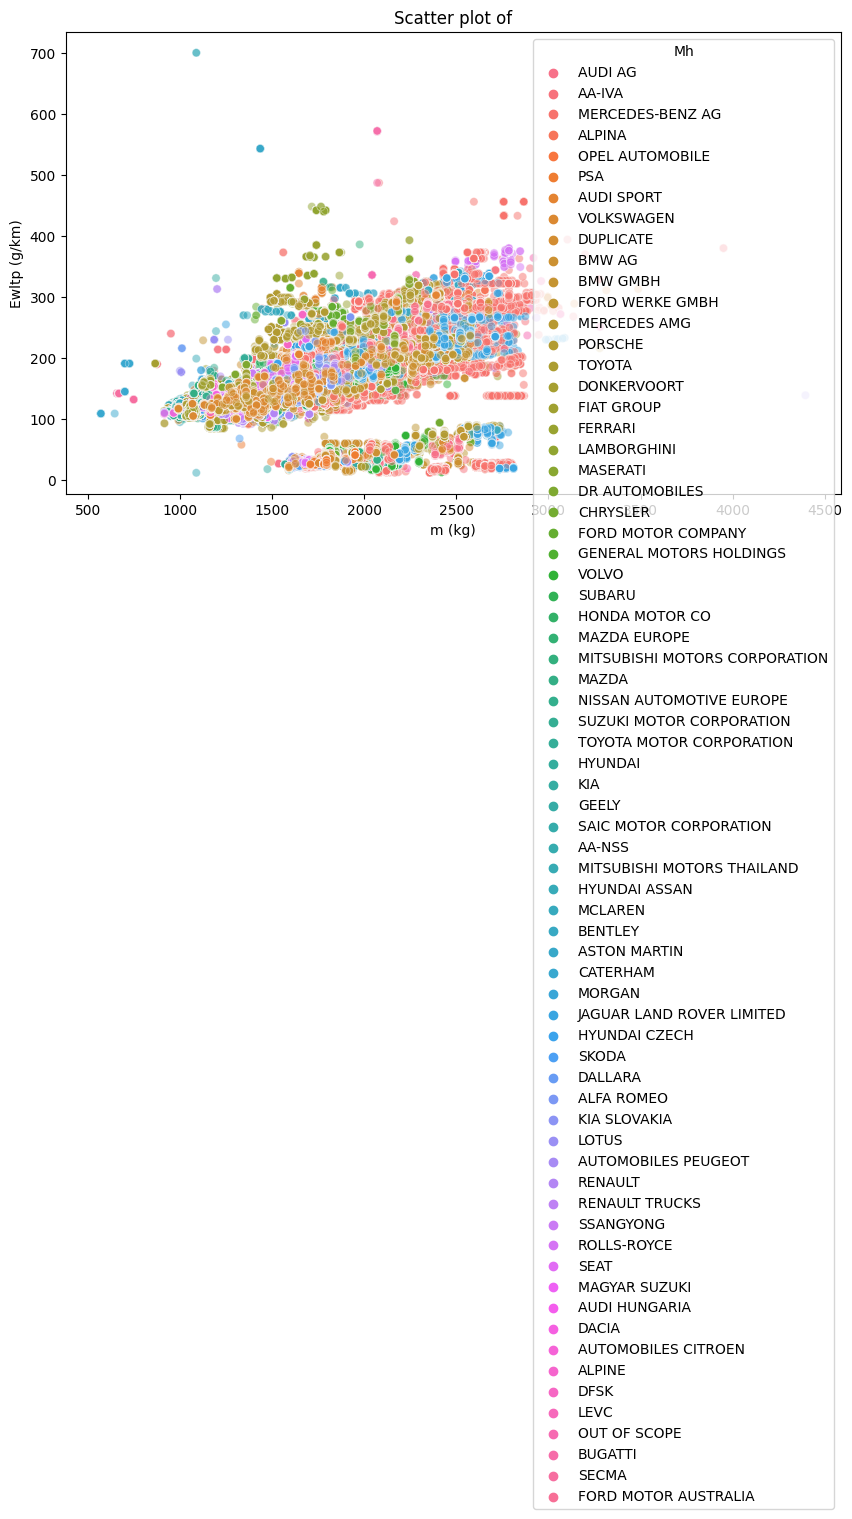

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="m (kg)", y="Ewltp (g/km)", hue="Mh", data=df_clean, alpha=0.5)
plt.title('Scatter plot of')
plt.show()


### 2.5.4 renew df_clean (update)

In [ ]:
df_clean.head()

Country       Mh  m (kg)  Ewltp (g/km)  At1 (mm)               Ft  \
ID                                                                           
80960000      DE  AUDI AG  2095.0         191.0    1603.0           DIESEL   
80960001      DE  AUDI AG  1910.0         179.0    1603.0           DIESEL   
80960002      DE  AUDI AG  1780.0         149.0    1603.0           DIESEL   
80960003      DE  AUDI AG  2150.0          35.0    1603.0  PETROL/ELECTRIC   
80960004      DE  AUDI AG  1780.0         148.0    1603.0           DIESEL   

          ec (cm3)  Fuel consumption   ft_new  
ID                                             
80960000    2967.0                7.3  Diesel  
80960001    2967.0                6.8  Diesel  
80960002    1968.0                5.7  Diesel  
80960003    1984.0                1.5  Hybrid  
80960004    1968.0                5.7  Diesel

In [ ]:
df_clean.drop(['Mh', 'Ft', 'Country'], axis=1, inplace=True)

In [ ]:
df_clean.columns

Index(['m (kg)', 'Ewltp (g/km)', 'At1 (mm)', 'ec (cm3)', 'Fuel consumption ',
       'ft_new'],
      dtype='object')

In [ ]:
df_clean.head()

m (kg)  Ewltp (g/km)  At1 (mm)  ec (cm3)  Fuel consumption   ft_new
ID                                                                           
80960000  2095.0         191.0    1603.0    2967.0                7.3  Diesel
80960001  1910.0         179.0    1603.0    2967.0                6.8  Diesel
80960002  1780.0         149.0    1603.0    1968.0                5.7  Diesel
80960003  2150.0          35.0    1603.0    1984.0                1.5  Hybrid
80960004  1780.0         148.0    1603.0    1968.0                5.7  Diesel

In [ ]:
sns.pairplot(df_clean)

plt.tight_layout()
plt.show()

### Encoding


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Select only the columns with the object data type
object_columns = df_clean.select_dtypes(include='object')

# Count the number of unique values in each column
unique_counts = object_columns.nunique()

# Print the result
print(unique_counts)

ft_new    4
dtype: int64


In [ ]:
# Prepare data
df_clean_encoded = df_clean.copy()
le = LabelEncoder()
df_clean_encoded['ft_new'] = le.fit_transform(df_clean_encoded['ft_new'])

In [ ]:
df_clean_encoded.head()

m (kg)  Ewltp (g/km)  At1 (mm)  ec (cm3)  Fuel consumption   ft_new
ID                                                                           
80960000  2095.0         191.0    1603.0    2967.0                7.3       1
80960001  1910.0         179.0    1603.0    2967.0                6.8       1
80960002  1780.0         149.0    1603.0    1968.0                5.7       1
80960003  2150.0          35.0    1603.0    1984.0                1.5       2
80960004  1780.0         148.0    1603.0    1968.0                5.7       1

In [ ]:
X = df_clean_encoded.drop('Fuel consumption ', axis=1)
y = df_clean_encoded['Fuel consumption ']

# Define model
rf = RandomForestRegressor()

# Define hyperparameters to tune
parameters = {'n_estimators': [100, 200], 'max_depth': [None, 5, 10]}

# Apply GridSearchCV
clf = GridSearchCV(rf, parameters)
clf.fit(X, y)

# Print best parameters
print(clf.best_params_)

## 2.6 `df_clean` final


In [ ]:
# drop dict see 3.
drop =  ['MMS', 'Ernedc (g/km)', 'De', 'Vf', 'Ve', "Status", 'Mp', 'Man', 'VFN','Man', 'Tan', 'T','Va',
         'IT', 'Mk','Cn', 'Cr', 'Enedc (g/km)', 'At2 (mm)', 'Electric range (km)', 'Fm', 'z (Wh/km)',
         'Erwltp (g/km)', 'Erwltp (g/km)', 'ep (KW)', 'W (mm)', 'Ct', 'Mt', 'r', 'year', 'Date of registration']

df_clean = df.drop(drop, axis=1)

# show missing values

print('missing values:\n',df_clean.isna().sum(),"\n")

# drop missing values
df_clean = df_clean.dropna()

## check missing values
missing_values = df_clean.isna().sum()
missing_values_sorted = missing_values.sort_values(ascending=False)
print("Check missing_values:/n/n",missing_values_sorted)

## 2.5.4 renew df_clean
df_clean.drop(['Mh', 'Ft', 'Country'], axis=1, inplace=True)


## Display Informations
print("df-Shape:/n",df.shape)
print("df_clean-Shape:/n",df_clean.shape)
print("df_clean-Info:/n",df_clean.info())

# Training and Test Data

In [ ]:
# Split in training- and test data
X = df_clean_encoded.drop('Fuel consumption', axis=1)
y = df_clean_encoded['Fuel consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### gridsearch cv

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definieren des Modells und des Parametergitters
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Initialisieren von GridSearchCV
grid_model = GridSearchCV(model, param_grid)

# Trainieren von GridSearchCV
grid_model.fit(X_train, y_train)

# Ausgeben der besten Parameter
print('Best parameters:', grid_model.best_params_)

# 3. Prediction

# 👷‍♂️ Project Meeting




## 08.09.2023

### Notes
> - Outliers
  >K-means (erase 1% of the Dataset)

> * Mean squared error
  > compare to values of our target vartiable
  - mean square error of 200 when target varible is 2000 -> 10%


### next steps ✅

1.   **Delete:**
  >*At1 (mm)                 2.25

  >*Date of registration     1.70

  >*ep (KW)                  0.25

  >*W (mm)                   0.23

  >*Ct                       0.16

  >*Ewltp (g/km)             0.16

### Next important informations

>* compare CO2 to categories
>* one hot encoding is recommend for our dataset


## 31.08.2023


### next steps ✅

1.   **Delete:**
  >*At1 (mm)                 2.25

  >*Date of registration     1.70

  >*ep (KW)                  0.25

  >*W (mm)                   0.23

  >*Ct                       0.16

  >*Ewltp (g/km)             0.16

### Next important informations

>* compare CO2 to categories
>* one hot encoding is recommend for our dataset

